<a id='Top'></a>
    
# Project 

# Table of Contents 


## Section 1  Sleep

<a href='#Sleep_data'>Importing and Cleaning Sleep Data</a> 

 
<a href='#Sleep_Analysis'>Sleep Data Analysis and Visualizations </a>

## Section 2 Exercise

<a href='#Exercise_Data'>Importing and Cleaning Exercise Data</a> 

 
<a href='#Exercise_Analysis'>Exercise Data Analysis and Visualizations </a>


## Section 3 Step


<a href='#Step_data'>Importing and Cleaning Step Data</a> 

 
<a href='#Step_Analysis'>Step Data Analysis and Visualizations </a>

## Section 4 Heart

<a href='#Heart_data'>Importing and Cleaning Heart Data</a> 

 
<a href='#Heart_Analysis'>Heart Data Analysis and Visualizations </a>


## Section 5 Floors

<a href='#Floors_data'>Importing and Cleaning Floors Data</a> 

 
<a href='#Floors_Analysis'>Floors Data Analysis and Visualizations </a>

## Section 6 Final

<a href='#Final_data'>Final Analysis</a> 



In [1]:
# import important libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns


# Section 1 

<a id='Sleep_Data'></a>



### Importing and Cleaning Sleep Data 

In [2]:
# import Sleep Data 
Sleep_data = pd.read_csv('C:/Users/Amar/Python_Project/sleep-export2.csv')
Sleep_data.head()

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN
3,3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,NaN,NaN,1529749920000,NaN,1529735940000,UTC-0300,1529750846337,NaN,1529750846337,NaN
4,4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,NaN,NaN,1515159660000,NaN,1515128040000,UTC-0400,1515159899850,NaN,1515159899850,NaN


In [3]:
#check how many rows and columns
Sleep_data.shape

(279, 14)

In [4]:
#check for NA values 
for i in range(len(Sleep_data.columns)):
    print(f'{Sleep_data.columns[i]} : {len(Sleep_data[-(pd.isnull(Sleep_data.iloc[:,i]))])}')

Unnamed: 0 : 279
efficiency : 279
has_sleep_data : 277
com.samsung.health.sleep.datauuid : 279
quality : 38
com.samsung.health.sleep.custom : 0
com.samsung.health.sleep.end_time : 279
original_wake_up_time : 36
com.samsung.health.sleep.start_time : 279
com.samsung.health.sleep.time_offset : 279
com.samsung.health.sleep.update_time : 279
original_bed_time : 36
com.samsung.health.sleep.create_time : 279
original_efficiency : 36


In [5]:
#check for unique values 
Sleep_data.nunique()

Unnamed: 0                              279
efficiency                              260
has_sleep_data                            1
com.samsung.health.sleep.datauuid       279
quality                                   5
com.samsung.health.sleep.custom           0
com.samsung.health.sleep.end_time       279
original_wake_up_time                    36
com.samsung.health.sleep.start_time     279
com.samsung.health.sleep.time_offset      3
com.samsung.health.sleep.update_time    279
original_bed_time                        36
com.samsung.health.sleep.create_time    279
original_efficiency                      36
dtype: int64

In [6]:
#investigate if 'has_sleep_data' is neccessary 
Sleep_data[Sleep_data.has_sleep_data != 1]

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
156,156,0.0,NaN,8a774fff-3766-42ac-bbad-7a75dc508661,50002.0,NaN,1525593000000,NaN,1525582200000,UTC-0300,1525738765861,NaN,1525738765861,NaN
264,264,0.0,NaN,f0555b25-9fd9-403a-89fd-eeb01f567fbc,50001.0,NaN,1525766400000,NaN,1525755600000,UTC-0300,1525777468143,NaN,1525777468143,NaN


To be on the safe side, when has_sleep_data is equal to NaN, it will be assumed that the sleep data is not applicable to the person, therefore any rows will be removed that have NaN values in 'has_sleep_data'

'com.samsung.health.sleep.datauuid' is data that Samsung uses to track the data for themselves. It is meaningless for our data analysis and will therefore be removed.

In [7]:
#investigate if 'quality' is neccessary 
Sleep_data[-(pd.isnull(Sleep_data.quality))].head()


,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.663040
8,8,87.598946,1.0,095e5c43-db7b-eb38-9bc1-c8b37e55c9e8,50003.0,NaN,1518167880000,1.518168e+12,1518145200000,UTC-0400,1518171560353,1.518145e+12,1518168011192,87.598946
21,21,94.575050,1.0,161a352b-f9fd-1a38-b8ae-6ef0fa498d4b,50004.0,NaN,1519732920000,1.519733e+12,1519699800000,UTC-0400,1519734729493,1.519700e+12,1519733014825,94.575050
22,22,96.572580,1.0,16c97b07-7605-bb1b-22a1-b48d5ac17ef7,50005.0,NaN,1520595720000,1.520596e+12,1520565960000,UTC-0400,1520599290789,1.520566e+12,1520595756968,96.572580
31,31,95.979900,1.0,1e75a548-8b60-1bce-c183-c0dfd44e798d,50003.0,NaN,1519642380000,1.519642e+12,1519618560000,UTC-0400,1519648616131,1.519619e+12,1519642478160,95.979900


In [8]:
Sleep_data[-(pd.isnull(Sleep_data.quality))].count()

Unnamed: 0                              38
efficiency                              38
has_sleep_data                          36
com.samsung.health.sleep.datauuid       38
quality                                 38
com.samsung.health.sleep.custom          0
com.samsung.health.sleep.end_time       38
original_wake_up_time                   36
com.samsung.health.sleep.start_time     38
com.samsung.health.sleep.time_offset    38
com.samsung.health.sleep.update_time    38
original_bed_time                       36
com.samsung.health.sleep.create_time    38
original_efficiency                     36
dtype: int64

The sleep quality data only exists in a maximum of 38 rows and there are only 5 unique values and of which are very similar numerically. What is interesting to note is that there are only 36 non null values for original_wake_up_time, original_bed_time and original_efficiency and for everyone sleep quality exits. This is an indication that these four columns are related. 

com.samsung.health.sleep.custom are all NaN values so this columns can be omitted. 

The rest of the columns seem useful. They will be imported into a humnan readable format and investigated further. 

In [9]:
import time

# read in data again 
Sleep_data_new = pd.read_csv('C:/Users/Amar/Python_Project/sleep-export2.csv', 
                       names = ['Efficiency', 'Has_Data', 'Quality','End_Time', 'Wake_Up_Time',
                               'Start_Time','Time_Offset','Update_Time','Bed_Time','Creation_Time',
                               'Original_Efficiency'],
                       usecols = [1,2,4,6,7,8,9,10,11,12,13])

# get rid of rows where Has_data is Nan 
Sleep_data_new = Sleep_data_new[-(pd.isnull(Sleep_data_new.Has_Data))]

#get rid of fist row 
Sleep_data_new = Sleep_data_new.iloc[1:,:]

# remove the row Has_Data (it is not useful anymore)
Sleep_data_new = Sleep_data_new.drop('Has_Data', axis = 1)

#convert Time columns into human readable format
Time_Columns = []
for i in Sleep_data_new.columns:
        if '_Time' in i:
            Time_Columns.append(i)
Time_Columns

for j in Time_Columns:
    Sleep_data_new[j] = pd.to_datetime(Sleep_data_new[j], unit='ms')
      
Sleep_data_new.head()

,Efficiency,Quality,End_Time,Wake_Up_Time,Start_Time,Time_Offset,Update_Time,Bed_Time,Creation_Time,Original_Efficiency
1,92.66304,50003.0,2018-03-08 09:30:00,2018-03-08 09:30:00,2018-03-08 03:23:00,UTC-0400,2018-03-08 13:39:58.387,2018-03-08 03:23:00,2018-03-08 09:32:02.181,92.66304
2,87.78802,NaN,2018-02-25 13:28:00,NaT,2018-02-25 06:15:00,UTC-0400,2018-02-25 13:30:16.332,NaT,2018-02-25 13:30:16.332,NaN
3,90.026955,NaN,2018-06-02 09:49:00,NaT,2018-06-02 03:37:00,UTC-0300,2018-06-02 09:49:32.094,NaT,2018-06-02 09:49:32.094,NaN
4,93.16239,NaN,2018-06-23 10:32:00,NaT,2018-06-23 06:39:00,UTC-0300,2018-06-23 10:47:26.337,NaT,2018-06-23 10:47:26.337,NaN
5,93.75,NaN,2018-01-05 13:41:00,NaT,2018-01-05 04:54:00,UTC-0400,2018-01-05 13:44:59.850,NaT,2018-01-05 13:44:59.850,NaN


Now the Data is all clean, but the Time_Offset has to be factored in. Also the dates are not in order. These must be arranged in order. The columns could also be rearranged in a more readable manner. 

In [10]:
# check how many uniques time zones 
Sleep_data_new.Time_Offset.unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

Assuming the data is from a Canadaian

UTC - 04 main city is Toronto ,

UTC - 03 main city is Halifax ,

UTC - 07 main city is Vancouver

Also it is important to note that day light savings time is not factored in UTC time. Therefore local time in Toronto,for example, is five hours behind UTC during winter, but four hours behind while daylight saving is observed there. This should be factored in to get accurate times. 

In [11]:
#get the Time_shift data 

Time_shift = []

for i in Sleep_data_new.iloc[:,5] : 
    Time_shift.append(int(i[5]))


# Define a function that will convert the time 
# Note the data ranges between 2017 and 2018. 


def Time_Converter_1 (column_num):
    
    import datetime as dt 

    Time_Data_Adjusted = []

    for j,x in enumerate(Sleep_data_new.iloc[:,column_num]): 
        
        if (x < pd.to_datetime('10/3/2019', format =  "%d/%m/%Y")) and (x > pd.to_datetime('10/11/2018', format =  "%d/%m/%Y")):
            # if x is less than March 10th 2019 and greater than November 10th 2018 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
      
        if (x > pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x < pd.to_datetime('4/11/2018', format =  "%d/%m/%Y")):
            # if x is greater than March 11th 2018 and less than November 4th 2018 - do not add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
       
        elif(x < pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x > pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is less than March 11th 2018 and greater than November 5th 2017 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
    
        elif(x > pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x < pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is greater than March 12th 2017 and less than November 5th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
        
        elif(x < pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x > pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
           # if x is less than March 12th 2017 and greater than November 6th 2016 - add an hour for DayLight Savings
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
            
        else :
            Time_Data_Adjusted.append((Sleep_data_new.iloc[j,column_num]))
    
    return Time_Data_Adjusted

In [12]:
#Adjust End_Time 

End_Time_Adjusted = Time_Converter_1(2)

#Adjust Wake_Up_Time 

Wake_Up_Time_Adjusted = Time_Converter_1(3)
    
#Adjust Start_Time 

Start_Time_Adjusted = Time_Converter_1(4)

#Adjust Update_Time 

Update_Time_Adjusted = Time_Converter_1(6)

#Adjust Bed_Time 

Bed_Time_Adjusted = Time_Converter_1(7)

#Adjust Creation_Time 

Creation_Time_Adjusted = Time_Converter_1(8)

# Get Sleep Duration 

Hours = []
for i in range(len(Start_Time_Adjusted)):
        diff =  Start_Time_Adjusted[i] - End_Time_Adjusted[i]
        Hours.append(diff)
        
Sleep_Duration_Hours = []
for j,x in enumerate(Hours):
    Sleep_Duration_Hours.append(24 - Hours[j].seconds/3600)


    
# Change Time_Offset into Human Readable form 

Time_Zone = []
for j,x in enumerate(Sleep_data_new.Time_Offset): 
    if Sleep_data_new.iloc[j,5] == 'UTC-0400':
        Time_Zone.append('Toronto Time')
        
    if Sleep_data_new.iloc[j,5] == 'UTC-0300':
        Time_Zone.append('Halifax Time')
    
    if Sleep_data_new.iloc[j,5] == 'UTC-0700':
        Time_Zone.append('Vancouver Time')   
        
# combine all the adjusted  relevant data into a new data frame 

Sleep_df = pd.DataFrame(
            {'Start_Time_Adjusted' : Start_Time_Adjusted,
             'End_Time_Adjusted' : End_Time_Adjusted,
             'Sleep_Duration_Hours' : Sleep_Duration_Hours,
             'time_offset' : Time_Zone,
             'Efficiency' : list(Sleep_data_new.Efficiency),
             })
# combine all extra data that may be relevant 

Sleep_df_extra = pd.DataFrame(
            {'Wake_Up_Time_Adjusted' : Wake_Up_Time_Adjusted,
             'Bed_Time_Adjusted' : Bed_Time_Adjusted,
             'time_offset' : Time_Zone,
             'Quality' : list(Sleep_data_new.Quality),
             'Original_Efficiency' : list(Sleep_data_new.Original_Efficiency)
             
            })

# add DATE column
Sleep_df["DATE"] = Sleep_df.End_Time_Adjusted.dt.date

#round efficiency 

Efficiency_Rounded = []

for i in range(len(Sleep_df.Efficiency)):
        Efficiency_Rounded.append(round(float(Sleep_df.Efficiency[i])))
        
Sleep_df['Efficiency'] = Efficiency_Rounded

# Sort the date in order 

Sleep_df = Sleep_df.sort_values('End_Time_Adjusted').reset_index(drop='True')

Sleep_df.shape

#Sleep_df.DATE


(277, 6)

In [13]:
# Sort the data and drop NA values
Sleep_df_extra.dropna(inplace=True)
Sleep_df_extra = Sleep_df_extra.sort_values('Wake_Up_Time_Adjusted').reset_index(drop='True')
Sleep_df_extra.head()


,Wake_Up_Time_Adjusted,Bed_Time_Adjusted,time_offset,Quality,Original_Efficiency
0,2018-01-09 06:38:00,2018-01-08 23:17:00,Toronto Time,50003.0,95.47511
1,2018-01-19 05:55:00,2018-01-18 21:38:00,Toronto Time,50002.0,92.36948
2,2018-01-21 06:09:00,2018-01-20 22:27:00,Toronto Time,50003.0,92.656586
3,2018-01-24 05:44:00,2018-01-23 23:00:00,Toronto Time,50003.0,92.34568
4,2018-01-25 04:55:00,2018-01-24 22:41:00,Toronto Time,50003.0,93.066666


Finally !!! The Data is clean and ready for analysis

<a id='Sleep_Analysis'></a>


### Sleep Data Analysis and Visualization 


<a href='#Top'>Back to Top </a>

In [14]:
# Average Sleep Time 
    
np.mean(Sleep_df.Sleep_Duration_Hours)



5.846690734055358

The Data indicates that on average the person sleeps about 5.84 hours which is reasonable amount of sleep. 

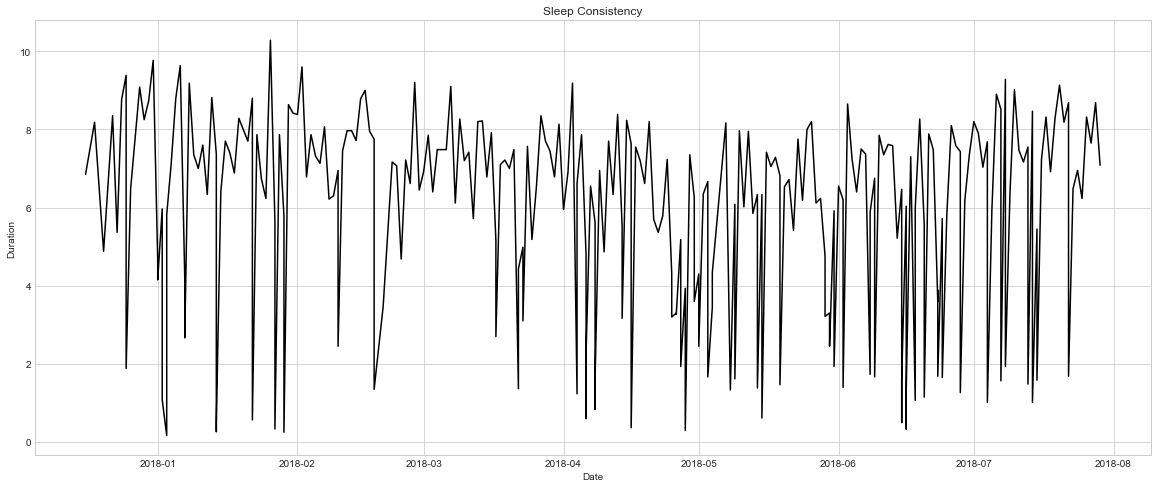

In [15]:
# Amount of sleep per day

plt.figure(figsize=(20,8))


plt.style.use('seaborn-whitegrid')

plt.title('Sleep Consistency')
plt.xlabel("Date")
plt.ylabel('Duration')

plt.plot(list(Sleep_df.End_Time_Adjusted.dt.date),Sleep_df.Sleep_Duration_Hours,'black')

plt.show()

The Graph shows that his sleep duration fluctuates quite a bit. This shows that the person is getting an inconsistent amount of sleep every night. A possible reason for this could be the person travels alot considering there are multiple time zones in the data. There are also some days where the person gets less than 2 hours of sleep. This also may also account for naps taken during the day. There seems to be a pattern for when this occurs. A further investigation will be induccted by finding the most common time he wakes up and the msot common time he falls asleep. 

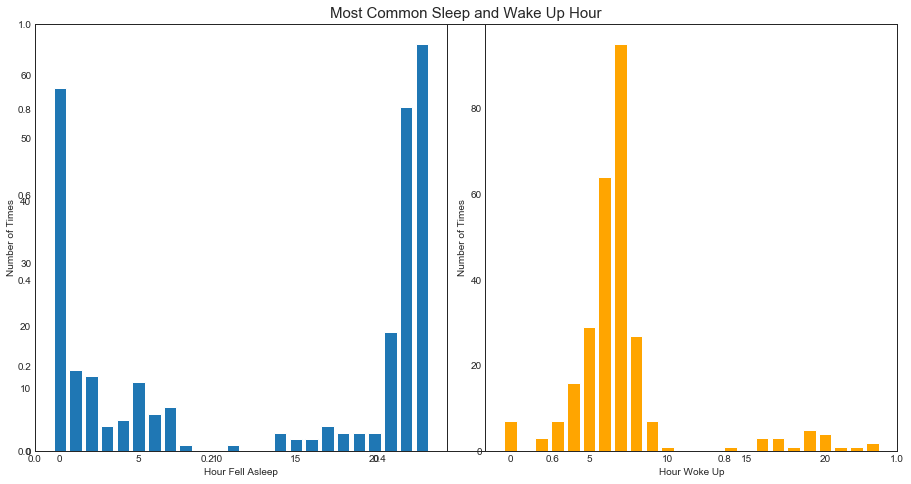

In [16]:
# find time went to bed and most common time woke up 

from collections import Counter

sns.set_style("ticks")


# get data for hour 
Start_Time_Hr = Sleep_df.Start_Time_Adjusted.dt.hour

End_Time_Hr = Sleep_df.End_Time_Adjusted.dt.hour

#count the data points 
Start_Hour_Counts = Counter(Start_Time_Hr)

End_Hour_Counts = Counter(End_Time_Hr)

# plot the sleep time hour and wake up time hour 

fig = plt.figure(figsize=(13.0, 7.0))

plt.subplots_adjust(wspace=0.4,hspace=0.4)

plt.title('Most Common Sleep and Wake Up Hour', fontsize = 15)

axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)



axes1.set_ylabel('Number of Times')
axes1.set_xlabel("Hour Fell Asleep")
axes1.bar(Start_Hour_Counts.keys(),Start_Hour_Counts.values())


axes2.set_ylabel('Number of Times')
axes2.set_xlabel("Hour Woke Up")
axes2.bar(End_Hour_Counts.keys(),End_Hour_Counts.values(),color='orange')


fig.tight_layout()
plt.show()

The person tends to fall asleep Around 12 and tends to wake up around 7. The most common times he falls asleep is at 10, 11 and 12. The most common time the person wakes up is 5, 6 and 7. 

The data shows that he does sleep during the day sometimes which may be the person taking naps but does not occur often. To investigate further into his sleeping habbits to find any noticable patterns, his sleep pattern for evey day of the week will be analysed. 

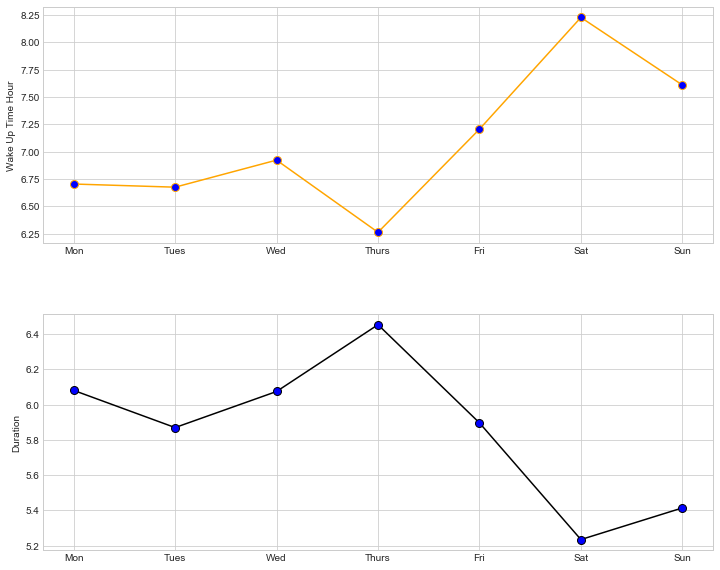

In [17]:
#### plot information about sleep duration, wake up time for day of the week 


# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Sleep_df.Start_Time_Adjusted.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Duration = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Hour' : Sleep_df.Sleep_Duration_Hours,

            })

Week_Day_Duration = Week_Day_Duration.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

#get info on week day VS Sleep Time 

Week_Day_Sleep_Time = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Time' : Sleep_df.Start_Time_Adjusted.dt.hour
            })

Week_Day_Sleep_Time =  Week_Day_Sleep_Time.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

#get info on week day VS Wake Up Time 

Week_Day_Wake_Time = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Time' : Sleep_df.End_Time_Adjusted.dt.hour
            })

Week_Day_Wake_Time =  Week_Day_Wake_Time.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])


#plot 

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12.0, 10.0))


axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

plt.subplots_adjust(wspace=0.4,hspace=0.3)


axes1.set_ylabel('Wake Up Time Hour')
axes1.plot(Week_Day_Wake_Time.index, Week_Day_Wake_Time.Time,marker='o', 
           markerfacecolor='blue', 
           markersize=8, color = 
           'orange')


axes2.set_ylabel('Duration')
axes2.plot(Week_Day_Duration.index,Week_Day_Duration.Hour,marker='o', 
           markerfacecolor='blue', 
           markersize=8, 
           color = 'black')


plt.show()
   



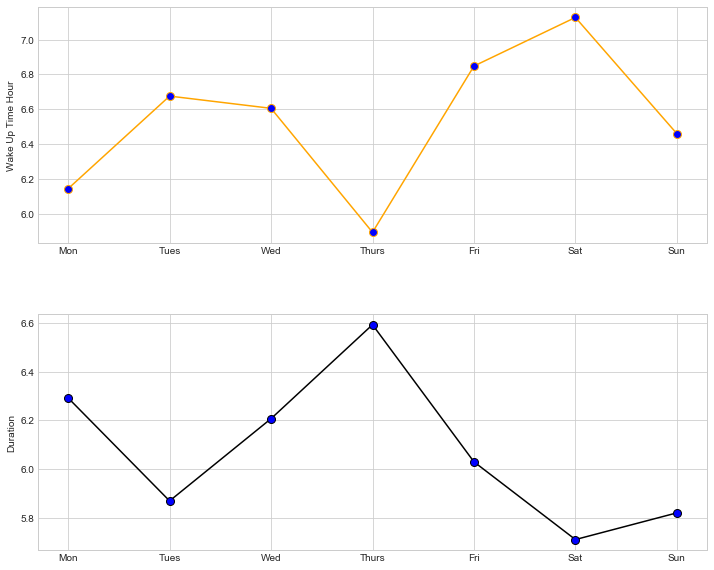

In [18]:
#### plot information about sleep duration, wake up time for day of the week with removing naps

## to make the data more accurate, it is best to filter out nap times
# the best way to do this is to assume from the data above 
#that when he falls asleep from 11 am  to 7 pm(19) he is taking a nap

Sleep_df['sleep_hour'] = Sleep_df.Start_Time_Adjusted.dt.hour
Sleep_df_no_nap = Sleep_df[-((Sleep_df.sleep_hour < 19) & (Sleep_df.sleep_hour > 11))]

# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Sleep_df_no_nap.Start_Time_Adjusted.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Duration = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Hour' : Sleep_df_no_nap.Sleep_Duration_Hours,

            })

Week_Day_Duration = Week_Day_Duration.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

#get info on week day VS Sleep Time 

Week_Day_Sleep_Time = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Time' : Sleep_df_no_nap.Start_Time_Adjusted.dt.hour
            })

Week_Day_Sleep_Time =  Week_Day_Sleep_Time.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

#get info on week day VS Wake Up Time 

Week_Day_Wake_Time = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Time' : Sleep_df_no_nap.End_Time_Adjusted.dt.hour
            })

Week_Day_Wake_Time =  Week_Day_Wake_Time.groupby('Weekday').mean()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])


#plot 

sns.set_style("whitegrid")

fig = plt.figure(figsize=(12.0, 10.0))


axes1 = plt.subplot(211)
axes2 = plt.subplot(212)

plt.subplots_adjust(wspace=0.4,hspace=0.3)


axes1.set_ylabel('Wake Up Time Hour')
axes1.plot(Week_Day_Wake_Time.index, Week_Day_Wake_Time.Time,marker='o', 
           markerfacecolor='blue', 
           markersize=8, color = 
           'orange')


axes2.set_ylabel('Duration')
axes2.plot(Week_Day_Duration.index,Week_Day_Duration.Hour,marker='o', 
           markerfacecolor='blue', 
           markersize=8, 
           color = 'black')


plt.show()

The graphs with the nap times taken out seem to be more accurate but are still similar to the previous graphs with naps included, therefore the same conclusions can be made. 

Next the sleep hour and sleep duration will be investigated. 

Text(0.5, 0, 'Wake Up Hour')

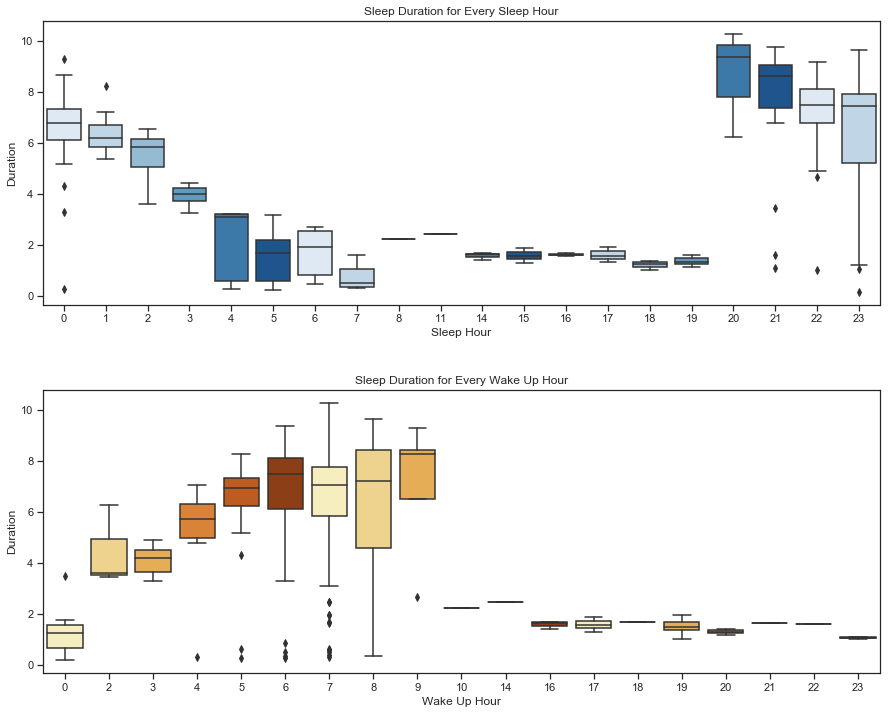

In [19]:
# box plots of sleep hour, wake up hour and duration

sns.set(style="ticks")

fig = plt.figure(figsize=(15, 12.0))

plt.subplots_adjust(wspace=0.4,hspace=0.3)

plt.title('Sleep Duration for Every Hour')

# plot sleep duration for every sleep hour 

pal_b = sns.color_palette("Blues")

plt.subplot(211)
plt.title('Sleep Duration for Every Sleep Hour')
ax1 = sns.boxplot(Sleep_df.Start_Time_Adjusted.dt.hour,
                  Sleep_df.Sleep_Duration_Hours, 
                  palette = pal_b)

ax1.set_ylabel('Duration')
ax1.set_xlabel('Sleep Hour')


#plot sleep duration for every wake up hour 

pal_y = sns.color_palette("YlOrBr")

plt.subplot(212)
plt.title('Sleep Duration for Every Wake Up Hour')
ax2 = sns.boxplot(Sleep_df.End_Time_Adjusted.dt.hour,
                  Sleep_df.Sleep_Duration_Hours, 
                  palette = pal_y)

ax2.set_ylabel('Duration')
ax2.set_xlabel('Wake Up Hour')

The data indicates that the persons range of sleep is the largest when he falls asleep during 11 to 12, showing that when he sleeps during 11 to 12 he may get too much sleep or too litle sleep. The person has the smallest range at a reasonable sleep hour when he falls alseep during 1 to 2. He also sleeps about 5 to 7 hours when he falls asleep during 1 to 2. The person has the second smallest range duration at a reasonable sleep hour when he falls alseep during 12 to 1. He also sleeps about 5 to 9 hours when he falls asleep during 12 to 1. 12 to 2 could likely be the most optimal time for him to sleep consireding the smaller range of durations and that the duration are at reasonable amounts. 

When considered the bar plot of 'Most Common Sleep and Wake Up Hour' 12, 1 and 11 have the most samples and therefore it can be conclued that data is relatively accurate for these hours. The rest of the hours have a low sample size so they may be considers outliers.

When the person falls asleep and wakes up during the day he sleeps for less than around 2 hours. This shows that the person takes about two hour naps during the day. There are a small amount of samples for these hours, showing he does not tak naps very often. 

The data also indicates that the person has the largest duration range when he wakes up during 8 to 9. When he wakes up at 7 to 8 he has the second largest range, from 6 to 7 the third largest range. These ranges also have outliers. It is important to note that these ranges are most likely greater becasue there are more samples. For a reeasonable wake up hour the optimal wake up times is from 6 to 8. 

It can be concluded that the person should aim to sleep between 12 to 2 and wake up between 6 to 8 if he wants to have a sleep duration range that is as close to 5 to 9 hours as possible within reasonable wake up times and sleep times. It can also be conluded that the person usually naps for just less than 2 hours and always more than 1 hour but does not nap frequently. 

Next the time zone will be factored in to observe to see if travelling affects his sleep patterns. 

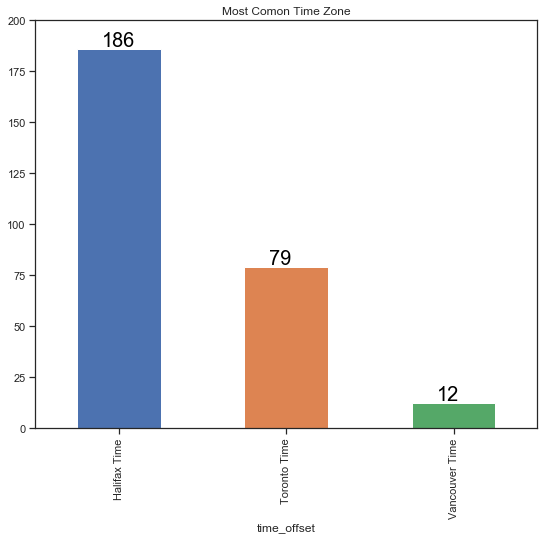

In [20]:
# plot sleep trends based on area 
sns.set_style("ticks")

Num_Time_Zone = list(Sleep_df.groupby('time_offset').count()['Start_Time_Adjusted'])

plt.figure(figsize=(9,7.5))

plt.ylim(0, 200)

ax = Sleep_df.groupby('time_offset').count()['Start_Time_Adjusted'].plot(kind='bar',
                                                                       title = 'Most Comon Time Zone')


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for x,i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.15,
            i.get_height()+1.5,
            str(Num_Time_Zone[x]), 
            fontsize=20,
                color='black')
        




From the graph above it can concluded that he has the most sleep data from when he was in Halifax, then Toronto and then Vancouver. The person is liekly to live in Halifax, visits Toronto often and vacations in Vancouver. It can also be concluded that he was within these three timzones for the duration of the given data. The persons location will be further investigated when all the data is combined together. 

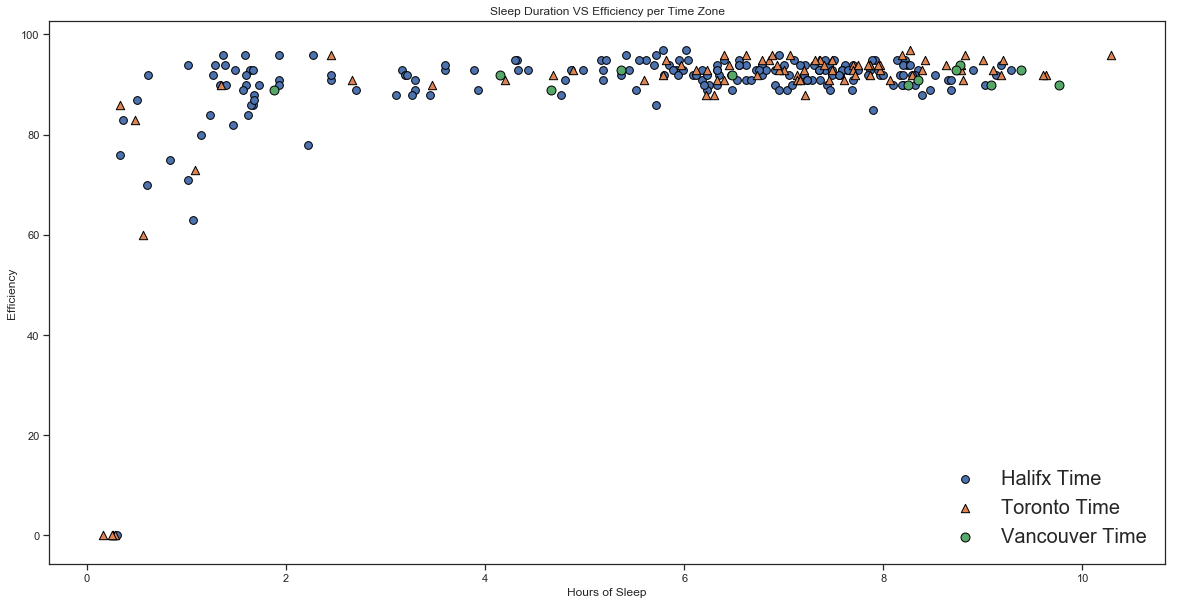

In [21]:
#sort based on time zone 

sns.set_style("ticks")

Sleep_df_Vancouver = Sleep_df[Sleep_df.time_offset == 'Vancouver Time'].reset_index(drop='True')
Sleep_df_Halifax = Sleep_df[Sleep_df.time_offset == 'Halifax Time'].reset_index(drop='True')
Sleep_df_Toronto = Sleep_df[Sleep_df.time_offset == 'Toronto Time'].reset_index(drop='True')

        
# find the duration of sleep per Time Zone 

Hours_Vancouver = Sleep_df_Vancouver.Start_Time_Adjusted - Sleep_df_Vancouver.End_Time_Adjusted

Hours_Toronto = Sleep_df_Toronto.Start_Time_Adjusted - Sleep_df_Toronto.End_Time_Adjusted

Hours_Halifax = Sleep_df_Halifax.Start_Time_Adjusted - Sleep_df_Halifax.End_Time_Adjusted


Sleep_Duration_Hours_Vancouver = []
for j,x in enumerate(Hours_Vancouver):
    Sleep_Duration_Hours_Vancouver.append(24 - Hours_Vancouver[j].seconds/3600)

Sleep_Duration_Hours_Toronto = []
for j,x in enumerate(Hours_Toronto):
    Sleep_Duration_Hours_Toronto.append(24 - Hours_Toronto[j].seconds/3600)

Sleep_Duration_Hours_Halifax = []
for j,x in enumerate(Hours_Halifax):
    Sleep_Duration_Hours_Halifax.append(24 - Hours_Halifax[j].seconds/3600)


# plot efficeincy VS hours of sleep for each time zone 
plt.figure(figsize=(20,10))

plt.title('Sleep Duration VS Efficiency per Time Zone')
plt.xlabel("Hours of Sleep")
plt.ylabel('Efficiency')

           
plt.scatter(Sleep_Duration_Hours_Halifax,Sleep_df_Halifax.Efficiency, marker ='o' , s=60, label='Halifx',edgecolors='black')
plt.scatter(Sleep_Duration_Hours_Toronto,Sleep_df_Toronto.Efficiency, marker ='^', s=70, label='Toronto',edgecolors='black')
plt.scatter(Sleep_Duration_Hours_Vancouver,Sleep_df_Vancouver.Efficiency, marker ='o', s =80, label='Vancouver',edgecolors='black')

plt.legend(('Halifx Time', 'Toronto Time','Vancouver Time'),
           loc='lower right',
           fontsize=20)
plt.show()

This plot shows the efficiency for the duration of sleep per time zone. The data may be biased becasue 186 data points came from Halifax Time, 79 data points came from Toronto Time, 12 data points came from Vancouver Time. For example it would be hard to make a solid conlusion about his/her sleeping patterns when in Vancouver because there are only 12 data points. Therefore the conclusions from the observtion should be taken with a grain of salt. 

From observing the data, it can be seen that the time where the person gets the most amount of sleep and the least amount of sleep is when he/she is in Toronto Time. There is only one instance where the person only got 1 hour of sleep in halifax, the rest were all in Toronto Time. This is an indication that when in Toronto Time the person may have trouble sleeping, take naps or may be doing an activity that requires him to sleep less. (Could be Partying too much!) 

It is also interesting to note that when the person is in Vancouver Time he/she has always had a fairly effiecient sleep. This could indicate that the person is doing something or something happpens to him to make him sleep well when he is in Vancouver Time. (Could be the Mountains!) 

There is correlation to duration of sleep and sleep effiecny. Any time after 2 hours of sleep the person almost always gets above 80% efficienct sleep and does not varry much past this mark. This shows that after 2 hours of sleep the sleep effieiceny will not change much. Any time under 2 hours of sleep, there is a higher chance of the person getting a less efficient sleep, with the lowest being almost 0 when the person has less than half an hour of sleep.

In conclusion the person should spend more time in Vancouver and less time in Toronto if he wants to have a better sleep. 


# Section 2 

<a id='Exercise_Data'></a>



### Importing and Cleaning Exercise Data 

<a href='#Top'>Back to Top </a>

In [22]:
Exercise_data = pd.read_csv('C:/Users/Amar/Python_Project/exercise.csv')
Exercise_data.head()

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,...,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,...,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,...,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
2,2,2018-05-01 18:12:20.915,NaN,NaN,2018-05-01 18:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,...,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,2018-02-24 13:50:02.929,NaN,NaN,2018-02-24 13:35:13.243,NaN,NaN,NaN,889686,F/D7+hL5E5,...,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,2018-03-16 17:25:39.584,NaN,NaN,2018-03-16 17:15:20.192,NaN,NaN,NaN,619392,F/D7+hL5E5,...,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581


Check the data to observe any irrelevant data points

In [23]:
# summary of the data 

Exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 39 columns):
Unnamed: 0               341 non-null int64
end_time                 341 non-null object
altitude_loss            7 non-null float64
max_altitude             10 non-null float64
start_time               341 non-null object
count                    36 non-null float64
altitude_gain            7 non-null float64
exercise_custom_type     0 non-null float64
duration                 341 non-null int64
deviceuuid               341 non-null object
max_heart_rate           219 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          219 non-null float64
pkg_name                 341 non-null object
max_cadence              220 non-null float64
time_offset              341 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         51 non-null float64
exercise_type            341 non-null int64
decline_distance         51 non-null float64


The data needs to be adjusted so that all irrelevant columns are removed, the time dates are converted and adjusted for time zone and codes be converted to humman readable form.  

In [24]:
### remove all colunms that are null and irrelevant columns 

Exercise_data = pd.read_csv('C:/Users/Amar/Python_Project/exercise.csv')
Exercise_data.head()


Exercise_data.drop(["Unnamed: 0", "exercise_custom_type","max_rpm",  "mean_caloricburn_rate",
                    "mean_power","mean_rpm", "max_power","max_caloricburn_rate","custom","additional",
                    "comment","deviceuuid","live_data","datauuid","update_time","create_time","pkg_name"]
                   ,axis=1, inplace=True)

### convert time into date time objects 
Exercise_data['end_time'] = pd.to_datetime(Exercise_data['end_time'])
Exercise_data['start_time'] = pd.to_datetime(Exercise_data['start_time'])

##create time converter function 

#get the Time_shift data 

Time_shift = []

for i in Exercise_data['time_offset'] : 
    Time_shift.append(int(i[5]))


# Define a function that will convert the time 
# Note the data ranges between 2017 and 2018. 

def Time_Converter_2 (column_num):
    
    import datetime as dt 

    Time_Data_Adjusted = []

    for j,x in enumerate(Exercise_data.iloc[:,column_num]): 
      
        if (x < pd.to_datetime('10/3/2019', format =  "%d/%m/%Y")) and (x > pd.to_datetime('10/11/2018', format =  "%d/%m/%Y")):
            # if x is less than March 10th 2019 and greater than November 10th 2018 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (x > pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x < pd.to_datetime('4/11/2018', format =  "%d/%m/%Y")):
            # if x is greater than March 11th 2018 and less than November 4th 2018 - do not add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
       
        elif(x < pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x > pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is less than March 11th 2018 and greater than November 5th 2017 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
    
        elif(x > pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x < pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is greater than March 12th 2017 and less than November 5th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
        
        elif(x < pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x > pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
           # if x is less than March 12th 2017 and greater than November 6th 2016 - add an hour for DayLight Savings
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
            
        elif(x > pd.to_datetime('13/3/2016', format =  "%d/%m/%Y")) and (x < pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
            # if x is greater than March 13th 2016 and less than November 6th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Exercise_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
          
    
    return Time_Data_Adjusted

# Adjust Time Data uing function above 

Exercise_data['end_time'] = Time_Converter_2(0)
Exercise_data['start_time'] = Time_Converter_2(3)

# make time offset into readalbe Time Zones 

Time_Zone = []

for j,x in enumerate(Exercise_data['time_offset']): 
    if Exercise_data.iloc[j,10] == 'UTC-0400':
        Time_Zone.append('Toronto Time')
        
    if Exercise_data.iloc[j,10] == 'UTC-0300':
        Time_Zone.append('Halifax Time')
        
    if Exercise_data.iloc[j,10] == 'UTC-0600':
        Time_Zone.append('Calgary Time')
   
    if Exercise_data.iloc[j,10] == 'UTC-0700':
        Time_Zone.append('Vancouver Time')

Exercise_data.time_offset = Time_Zone 


####convert exrecise type to readable data 
# create new data frame with exercise tpye converted 

Exercise ={"Number": [0,1001,1002,11007,13001,14001,15006],
           "Exercise": ["Custom", "Walking", "Running", "Cycling", "Hiking", "Swimming", "Elliptical"]}

Exercise_name=pd.DataFrame(Exercise)

# merge data frames 

Exercise_data = pd.merge(left = Exercise_data, 
                         right = Exercise_name,
                         how ='left',
                         left_on = 'exercise_type', 
                         right_on = "Number")
#drop Exercise type 
Exercise_data.drop(['Number','exercise_type'],axis=1, inplace=True)

#find exercise duration in minutes 

Hours = []
for i in range(len(Exercise_data.start_time)):
        diff =  Exercise_data.start_time[i] - Exercise_data.end_time[i]
        Hours.append(diff)
        

Exercise_Duration_Minutes = []
for j,x in enumerate(Hours):
    Exercise_Duration_Minutes.append(round((24 - Hours[j].seconds/3600)*60,2))


Exercise_data['duration'] = Exercise_Duration_Minutes 

# add extra column with date information 

Exercise_data["DATE"] = Exercise_data.start_time.dt.date

# Sort the date in order 

Exercise_data = Exercise_data.sort_values('start_time').reset_index(drop='True')

#display the data

Exercise_data.head()


,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,duration,max_heart_rate,mean_heart_rate,max_cadence,...,max_speed,calorie,mean_cadence,mean_speed,min_altitude,min_heart_rate,count_type,distance,Exercise,DATE
0,2016-06-25 04:34:00.642,21.847322,289.64343,2016-06-25 04:28:30.517,NaN,14.775119,5.52,NaN,NaN,NaN,...,2.492401,66.0,NaN,2.492401,272.650970,NaN,NaN,820.0,Running,2016-06-25
1,2016-09-24 13:13:43.659,2.212103,525.21010,2016-09-24 12:22:47.097,NaN,169.573210,50.95,NaN,NaN,NaN,...,1.684247,105.0,NaN,0.920603,342.523250,NaN,NaN,910.0,Hiking,2016-09-24
2,2016-09-27 15:04:05.302,58.465260,65.75034,2016-09-27 14:21:42.571,NaN,64.041130,42.38,NaN,NaN,NaN,...,3.024856,408.0,NaN,2.000407,52.467632,NaN,NaN,4910.0,Running,2016-09-27
3,2016-09-30 17:42:10.952,62.106870,59.14466,2016-09-30 15:29:56.624,NaN,65.792010,132.25,NaN,NaN,NaN,...,4.415482,459.0,NaN,0.000000,44.218452,NaN,NaN,5510.0,Running,2016-09-30
4,2017-03-06 05:22:41.693,26.255226,152.85818,2017-03-06 05:05:28.618,2580.0,46.809795,17.23,NaN,NaN,170.51129,...,3.082483,230.0,159.55493,2.899804,128.303540,NaN,30001.0,2950.0,Running,2017-03-06


In [25]:
Exercise_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 23 columns):
end_time            341 non-null datetime64[ns]
altitude_loss       7 non-null float64
max_altitude        10 non-null float64
start_time          341 non-null datetime64[ns]
count               36 non-null float64
altitude_gain       7 non-null float64
duration            341 non-null float64
max_heart_rate      219 non-null float64
mean_heart_rate     219 non-null float64
max_cadence         220 non-null float64
time_offset         341 non-null object
incline_distance    51 non-null float64
decline_distance    51 non-null float64
max_speed           256 non-null float64
calorie             341 non-null float64
mean_cadence        220 non-null float64
mean_speed          329 non-null float64
min_altitude        10 non-null float64
min_heart_rate      219 non-null float64
count_type          36 non-null float64
distance            329 non-null float64
Exercise            341 non-nul

In order to oraganize the data more clearly, data frames will be created for each exercsie and only relevent data for that specifc exercise will be kept.

In [26]:
###Custom

#get info on Custom exercise 

Custom_df = Exercise_data[Exercise_data.Exercise == 'Custom']

Custom_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 10 to 320
Data columns (total 23 columns):
end_time            47 non-null datetime64[ns]
altitude_loss       0 non-null float64
max_altitude        0 non-null float64
start_time          47 non-null datetime64[ns]
count               0 non-null float64
altitude_gain       0 non-null float64
duration            47 non-null float64
max_heart_rate      47 non-null float64
mean_heart_rate     47 non-null float64
max_cadence         47 non-null float64
time_offset         47 non-null object
incline_distance    40 non-null float64
decline_distance    40 non-null float64
max_speed           0 non-null float64
calorie             47 non-null float64
mean_cadence        47 non-null float64
mean_speed          40 non-null float64
min_altitude        0 non-null float64
min_heart_rate      47 non-null float64
count_type          0 non-null float64
distance            40 non-null float64
Exercise            47 non-null object
DATE      

In [27]:
# drop any unnecessary values 

Custom_df.drop(["altitude_loss", "max_altitude","count", "altitude_gain",
                "min_altitude","count_type","max_speed",
                "mean_cadence","incline_distance","decline_distance","max_cadence",
                "mean_speed","distance"]
                   ,axis=1, inplace=True)

Custom_df.head()


C:\Users\Amar\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,end_time,start_time,duration,max_heart_rate,mean_heart_rate,time_offset,calorie,min_heart_rate,Exercise,DATE
10,2017-12-19 10:36:59.371,2017-12-19 10:06:26.046,30.57,182.0,126.0,Toronto Time,160.901,67.0,Custom,2017-12-19
14,2017-12-21 11:30:06.710,2017-12-21 11:24:51.128,5.27,129.0,118.0,Vancouver Time,27.645,97.0,Custom,2017-12-21
16,2017-12-24 04:51:46.961,2017-12-24 04:16:05.548,35.70,169.0,140.0,Vancouver Time,186.877,86.0,Custom,2017-12-24
19,2017-12-29 07:15:34.817,2017-12-29 07:15:21.996,0.22,70.0,70.0,Vancouver Time,0.715,69.0,Custom,2017-12-29
20,2017-12-29 08:41:21.980,2017-12-29 07:32:24.297,68.97,220.0,140.0,Vancouver Time,366.661,79.0,Custom,2017-12-29


In [28]:
### Walking 

# to get info on walking 
Walking_df = Exercise_data[ Exercise_data.Exercise == 'Walking']

Walking_df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 6 to 340
Data columns (total 23 columns):
end_time            251 non-null datetime64[ns]
altitude_loss       1 non-null float64
max_altitude        2 non-null float64
start_time          251 non-null datetime64[ns]
count               4 non-null float64
altitude_gain       1 non-null float64
duration            251 non-null float64
max_heart_rate      165 non-null float64
mean_heart_rate     165 non-null float64
max_cadence         165 non-null float64
time_offset         251 non-null object
incline_distance    3 non-null float64
decline_distance    3 non-null float64
max_speed           248 non-null float64
calorie             251 non-null float64
mean_cadence        165 non-null float64
mean_speed          251 non-null float64
min_altitude        2 non-null float64
min_heart_rate      165 non-null float64
count_type          4 non-null float64
distance            251 non-null float64
Exercise            251 non-null obje

In [29]:
# filter any uneccessary data 

Walking_df.drop(["altitude_loss", "max_altitude","count",  "altitude_gain",
                 "incline_distance","decline_distance", "min_altitude","count_type",
                 "mean_cadence","min_heart_rate","max_cadence","max_heart_rate",
                 "mean_heart_rate"]
                   ,axis=1, inplace=True)


Walking_df.head()

,end_time,start_time,duration,time_offset,max_speed,calorie,mean_speed,distance,Exercise,DATE
6,2017-11-28 12:03:05.366,2017-11-28 11:15:59.218,47.12,Toronto Time,1.727394,246.00,1.499006,3770.000,Walking,2017-11-28
8,2017-12-18 03:17:07.982,2017-12-18 03:06:21.358,10.78,Toronto Time,1.555556,55.52,1.398875,782.230,Walking,2017-12-18
9,2017-12-18 11:43:51.230,2017-12-18 11:28:56.911,14.92,Toronto Time,1.588393,58.15,1.390914,901.920,Walking,2017-12-18
11,2017-12-20 07:55:16.042,2017-12-20 07:41:16.388,14.00,Vancouver Time,1.332194,50.77,1.114794,820.900,Walking,2017-12-20
12,2017-12-20 08:18:41.488,2017-12-20 08:05:57.725,12.73,Vancouver Time,1.694444,47.97,1.241217,724.241,Walking,2017-12-20


In [30]:
### Running 


Running_df = Exercise_data[ Exercise_data.Exercise == 'Running']

Running_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 24
Data columns (total 23 columns):
end_time            6 non-null datetime64[ns]
altitude_loss       4 non-null float64
max_altitude        6 non-null float64
start_time          6 non-null datetime64[ns]
count               1 non-null float64
altitude_gain       4 non-null float64
duration            6 non-null float64
max_heart_rate      2 non-null float64
mean_heart_rate     2 non-null float64
max_cadence         3 non-null float64
time_offset         6 non-null object
incline_distance    6 non-null float64
decline_distance    6 non-null float64
max_speed           6 non-null float64
calorie             6 non-null float64
mean_cadence        3 non-null float64
mean_speed          6 non-null float64
min_altitude        6 non-null float64
min_heart_rate      2 non-null float64
count_type          1 non-null float64
distance            6 non-null float64
Exercise            6 non-null object
DATE                6 non-nu

In [31]:
Running_df.drop(['count','count_type'],axis=1,inplace =True)

Running_df


,end_time,altitude_loss,max_altitude,start_time,altitude_gain,duration,max_heart_rate,mean_heart_rate,max_cadence,time_offset,...,decline_distance,max_speed,calorie,mean_cadence,mean_speed,min_altitude,min_heart_rate,distance,Exercise,DATE
0,2016-06-25 04:34:00.642,21.847322,289.64343,2016-06-25 04:28:30.517,14.775119,5.52,NaN,NaN,NaN,Calgary Time,...,261.000,2.492401,66.000,NaN,2.492401,272.650970,NaN,820.000,Running,2016-06-25
2,2016-09-27 15:04:05.302,58.465260,65.75034,2016-09-27 14:21:42.571,64.041130,42.38,NaN,NaN,NaN,Calgary Time,...,554.000,3.024856,408.000,NaN,2.000407,52.467632,NaN,4910.000,Running,2016-09-27
3,2016-09-30 17:42:10.952,62.106870,59.14466,2016-09-30 15:29:56.624,65.792010,132.25,NaN,NaN,NaN,Calgary Time,...,451.000,4.415482,459.000,NaN,0.000000,44.218452,NaN,5510.000,Running,2016-09-30
4,2017-03-06 05:22:41.693,26.255226,152.85818,2017-03-06 05:05:28.618,46.809795,17.23,NaN,NaN,170.51129,Toronto Time,...,161.000,3.082483,230.000,159.55493,2.899804,128.303540,NaN,2950.000,Running,2017-03-06
15,2017-12-24 04:13:36.663,NaN,271.39700,2017-12-24 03:44:37.515,NaN,29.00,220.0,167.0,167.79600,Vancouver Time,...,855.829,3.831000,366.347,141.91083,2.748201,231.148000,116.0,4420.025,Running,2017-12-24
24,2017-12-31 05:57:21.337,NaN,252.79300,2017-12-31 05:23:53.343,NaN,33.47,199.0,162.0,208.46000,Vancouver Time,...,786.556,3.932000,385.162,141.54399,2.569652,213.782000,94.0,4829.808,Running,2017-12-31


In [32]:
### Cycling

# get info on cycling data 

Cycling_df = Exercise_data[ Exercise_data.Exercise == 'Cycling']

Cycling_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 5 to 146
Data columns (total 23 columns):
end_time            5 non-null datetime64[ns]
altitude_loss       1 non-null float64
max_altitude        1 non-null float64
start_time          5 non-null datetime64[ns]
count               1 non-null float64
altitude_gain       1 non-null float64
duration            5 non-null float64
max_heart_rate      4 non-null float64
mean_heart_rate     4 non-null float64
max_cadence         4 non-null float64
time_offset         5 non-null object
incline_distance    1 non-null float64
decline_distance    1 non-null float64
max_speed           1 non-null float64
calorie             5 non-null float64
mean_cadence        4 non-null float64
mean_speed          1 non-null float64
min_altitude        1 non-null float64
min_heart_rate      4 non-null float64
count_type          1 non-null float64
distance            1 non-null float64
Exercise            5 non-null object
DATE                5 non-n

In [33]:
#filter the out the uneccesary data 
        
Cycling_df.drop(["altitude_loss", "max_altitude","count",  "altitude_gain",
                 "incline_distance","decline_distance", "min_altitude","count_type",
                 "min_heart_rate","max_cadence","max_heart_rate",
                 "mean_heart_rate","distance","mean_speed","mean_cadence","max_speed"]
                   ,axis=1, inplace=True)
Cycling_df

,end_time,start_time,duration,time_offset,calorie,Exercise,DATE
5,2017-03-07 04:48:26.107,2017-03-07 04:48:16.225,0.17,Toronto Time,1.000,Cycling,2017-03-07
143,2018-02-24 08:28:58.514,2018-02-24 07:47:46.997,41.20,Toronto Time,461.349,Cycling,2018-02-24
144,2018-02-24 08:50:02.929,2018-02-24 08:35:13.243,14.83,Toronto Time,166.074,Cycling,2018-02-24
145,2018-02-24 09:01:41.242,2018-02-24 08:51:41.242,10.00,Toronto Time,112.000,Cycling,2018-02-24
146,2018-02-24 09:40:53.932,2018-02-24 09:23:15.309,17.65,Toronto Time,197.609,Cycling,2018-02-24


In [34]:
### Hiking

Hiking_df = Exercise_data[Exercise_data.Exercise == 'Hiking']

Hiking_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 1 to 1
Data columns (total 23 columns):
end_time            1 non-null datetime64[ns]
altitude_loss       1 non-null float64
max_altitude        1 non-null float64
start_time          1 non-null datetime64[ns]
count               0 non-null float64
altitude_gain       1 non-null float64
duration            1 non-null float64
max_heart_rate      0 non-null float64
mean_heart_rate     0 non-null float64
max_cadence         0 non-null float64
time_offset         1 non-null object
incline_distance    1 non-null float64
decline_distance    1 non-null float64
max_speed           1 non-null float64
calorie             1 non-null float64
mean_cadence        0 non-null float64
mean_speed          1 non-null float64
min_altitude        1 non-null float64
min_heart_rate      0 non-null float64
count_type          0 non-null float64
distance            1 non-null float64
Exercise            1 non-null object
DATE                1 non-nul

In [35]:
### Hiking 

Hiking_df.drop([ "count",
                 "incline_distance","decline_distance", "min_altitude","count_type",
                 "min_heart_rate","max_cadence","max_heart_rate",
                 "mean_heart_rate","mean_speed","mean_cadence","max_speed"]
                   ,axis=1, inplace=True)

Hiking_df

,end_time,altitude_loss,max_altitude,start_time,altitude_gain,duration,time_offset,calorie,distance,Exercise,DATE
1,2016-09-24 13:13:43.659,2.212103,525.2101,2016-09-24 12:22:47.097,169.57321,50.95,Calgary Time,105.0,910.0,Hiking,2016-09-24


In [36]:
###Swimming

# to get info on swimming 
Swimming_df = Exercise_data[ Exercise_data.Exercise == 'Swimming']

Swimming_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 32 to 332
Data columns (total 23 columns):
end_time            30 non-null datetime64[ns]
altitude_loss       0 non-null float64
max_altitude        0 non-null float64
start_time          30 non-null datetime64[ns]
count               30 non-null float64
altitude_gain       0 non-null float64
duration            30 non-null float64
max_heart_rate      0 non-null float64
mean_heart_rate     0 non-null float64
max_cadence         0 non-null float64
time_offset         30 non-null object
incline_distance    0 non-null float64
decline_distance    0 non-null float64
max_speed           0 non-null float64
calorie             30 non-null float64
mean_cadence        0 non-null float64
mean_speed          30 non-null float64
min_altitude        0 non-null float64
min_heart_rate      0 non-null float64
count_type          30 non-null float64
distance            30 non-null float64
Exercise            30 non-null object
DATE           

In [37]:
Swimming_df.drop(["altitude_loss", "max_altitude", "altitude_gain",
                 "incline_distance","decline_distance", "min_altitude",
                 "mean_cadence","min_heart_rate","max_cadence","max_heart_rate",
                 "mean_heart_rate","mean_speed","count","max_speed","mean_speed",
                 "distance"]
                   ,axis=1, inplace=True)

Swimming_df.head()

,end_time,start_time,duration,time_offset,calorie,count_type,Exercise,DATE
32,2018-01-05 05:37:00,2018-01-05 05:22:00,15.0,Toronto Time,126.0,30004.0,Swimming,2018-01-05
36,2018-01-06 11:30:00,2018-01-06 11:10:00,20.0,Toronto Time,168.0,30004.0,Swimming,2018-01-06
41,2018-01-09 03:39:00,2018-01-09 03:09:00,30.0,Toronto Time,252.0,30004.0,Swimming,2018-01-09
44,2018-01-10 09:29:00,2018-01-10 08:59:00,30.0,Toronto Time,252.0,30004.0,Swimming,2018-01-10
47,2018-01-12 05:12:00,2018-01-12 04:42:00,30.0,Toronto Time,252.0,30004.0,Swimming,2018-01-12


In [38]:
###Elliptical

Elliptical_df = Exercise_data[ Exercise_data.Exercise =='Elliptical']

Elliptical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 7 to 7
Data columns (total 23 columns):
end_time            1 non-null datetime64[ns]
altitude_loss       0 non-null float64
max_altitude        0 non-null float64
start_time          1 non-null datetime64[ns]
count               0 non-null float64
altitude_gain       0 non-null float64
duration            1 non-null float64
max_heart_rate      1 non-null float64
mean_heart_rate     1 non-null float64
max_cadence         1 non-null float64
time_offset         1 non-null object
incline_distance    0 non-null float64
decline_distance    0 non-null float64
max_speed           0 non-null float64
calorie             1 non-null float64
mean_cadence        1 non-null float64
mean_speed          0 non-null float64
min_altitude        0 non-null float64
min_heart_rate      1 non-null float64
count_type          0 non-null float64
distance            0 non-null float64
Exercise            1 non-null object
DATE                1 non-nul

In [39]:
Elliptical_df.drop(["altitude_loss", "max_altitude", "altitude_gain",
                 "incline_distance","decline_distance", "min_altitude",
                 "mean_cadence","min_heart_rate","max_cadence","max_heart_rate",
                 "mean_heart_rate","mean_speed","count","max_speed","mean_speed",
                 "distance","count_type"],axis=1, inplace=True)

Elliptical_df.head()

,end_time,start_time,duration,time_offset,calorie,Exercise,DATE
7,2017-12-17 11:38:07.177,2017-12-17 11:29:25.721,8.7,Toronto Time,60.836,Elliptical,2017-12-17


<a id='Exercise_Analysis'> </a>


 
### Exercise Analysis and Visualization 

<a href='#Top'>Back to Top </a>

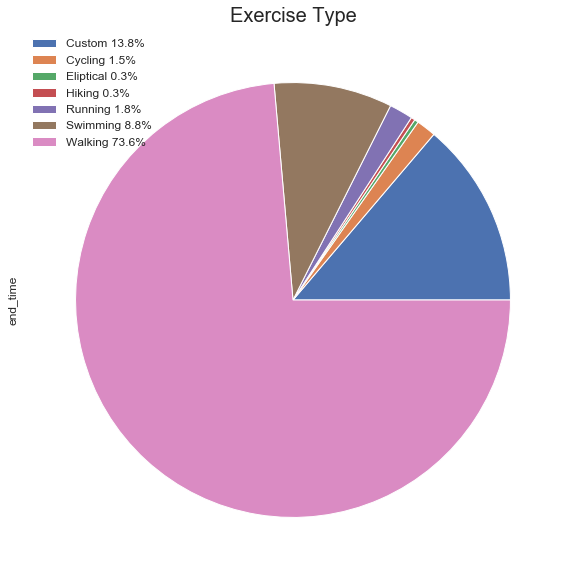

In [40]:
# Most Common Exercise Type 

sns.set_style("ticks")

Exercise_count = list(round(Exercise_data.groupby('Exercise').count()['end_time']))

# find the percentage of exercise types 
Exercise_Percent = [] 

for i in Exercise_count : 
    Exercise_Percent.append(round((i/sum(Exercise_count))*100,ndigits=1))
    
# plot 

plt.figure(figsize=(10,10))

plt.title('Exercise Type',fontsize=20)

Exercise_data.groupby('Exercise').count()['end_time'].plot(kind = 'pie',
                                                                 y = 'Count',
                                                                 labels=['','','','','','',''])



plt.legend((f'Custom {Exercise_Percent[0]}%', 
            f'Cycling {Exercise_Percent[1]}%',
            f'Eliptical {Exercise_Percent[2]}%',
            f'Hiking {Exercise_Percent[3]}%',
            f'Running {Exercise_Percent[4]}%',
            f'Swimming {Exercise_Percent[5]}%',
            f'Walking {Exercise_Percent[6]}%'),
           loc='upper left',
           fontsize=12)



From the graph above, it can be seen that the persons most common exercise type is walking. In fact 73.6% of his exercise comes from walking. The second most common exercise is the custom exercise which makes up 13.8% of his exercise. There is no iformation on what this exercise is therefore further investigation will be carried out to infer more about this ecercise type. The third most common exercise is swimming which makes up 8.8% of his exercise. Running and Cycling make up 1.8% and 1.5% respectively of his exercise. 

Hiking and Elliptical make up only 0.3% of his exercise which translates into only one data point for each exercise. Therefore he has only hiked or done the elliptical once in his life, or only recored it once in his life. These two types of exercises are considered outliers and it will be difficult to make an conclusion about them.  

The next thing to investigate is to observe how intense and effective each workout is. 


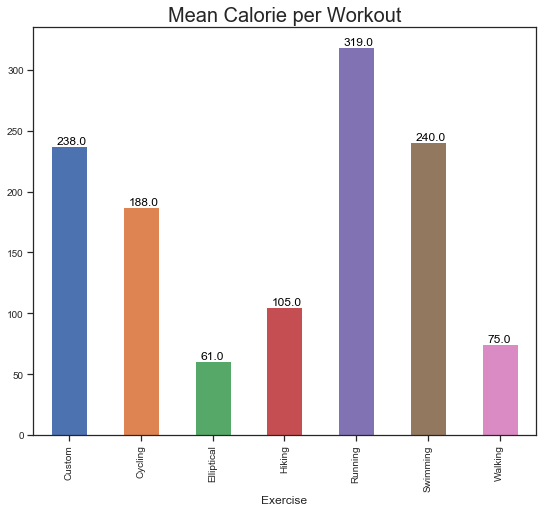

In [41]:
# calorie per workout 
sns.set_style("ticks")

plt.figure(figsize=(9,7.5))

Calorie_mean = list(round(Exercise_data.groupby('Exercise').mean()['calorie']))

plt.title('Mean Calorie per Workout', fontsize=20)

ax1 = Exercise_data.groupby('Exercise').mean()['calorie'].plot(kind = 'bar',
                                                              fontsize =10)

# set individual bar lables using above list
for x,i in enumerate(ax1.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+.08,
            i.get_height()+1.5,
            str(Calorie_mean[x]), 
            fontsize=12,
                color='black')
    


The bar plot above shows the average amount of calories burned for each workout. It can be seen that Running burns the most calories per workout. Excluding elliptical, walking gives the least calories per workout. 

Excluding hiking and eliptical, it is interesting to note that the exercises that burn the most calories are the ones that the person tends to do the least. This could be due to the fact that the exercises that burn the most calories are difficult, tend to have less ease of access, the person does not like them or for some other reason.  

If the goal for the person it to loose the most calories per workout,he should do more exercises such as running or swimming.  


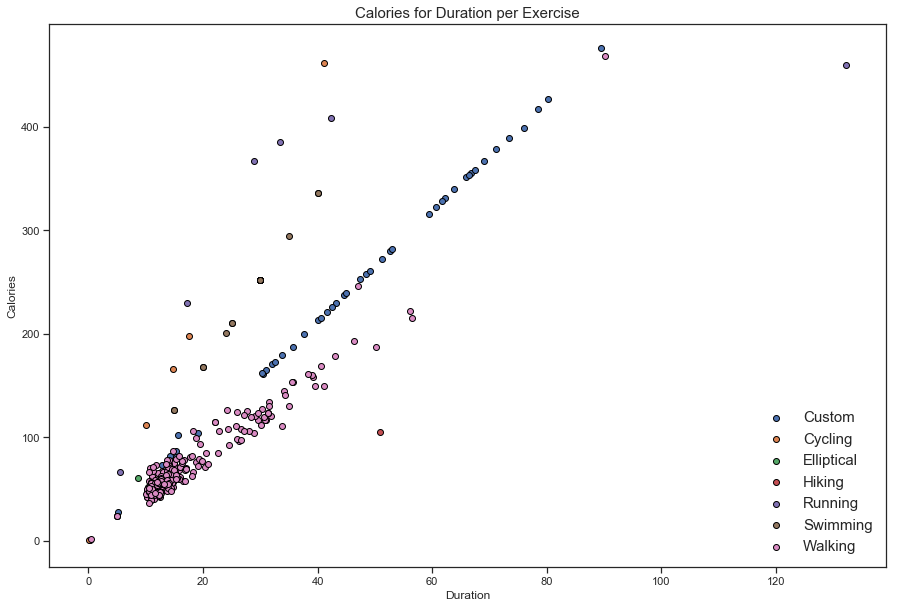

In [42]:
# calorie VS duration for each exercise 

plt.figure(figsize=(15,10))

sns.set_style("ticks")

plt.title('Calories for Duration per Exercise',fontsize = 15)
plt.xlabel("Duration")
plt.ylabel('Calories')

          
plt.scatter(Exercise_data[Exercise_data.Exercise == 'Custom'].duration,
            Exercise_data[Exercise_data.Exercise == 'Custom'].calorie,
            marker ='o',label='Custom',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Cycling'].duration,
            Exercise_data[Exercise_data.Exercise == 'Cycling'].calorie,
            marker ='o',label='Cycling',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Elliptical'].duration,
            Exercise_data[Exercise_data.Exercise == 'Elliptical'].calorie,
            marker ='o', label='Elliptical',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Hiking'].duration,
            Exercise_data[Exercise_data.Exercise == 'Hiking'].calorie,
            marker ='o',label='Hiking',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Running'].duration,
            Exercise_data[Exercise_data.Exercise == 'Running'].calorie,
            marker ='o',label='Running',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Swimming'].duration,
            Exercise_data[Exercise_data.Exercise == 'Swimming'].calorie,
            marker ='o',label='Swimming',edgecolors='black')

plt.scatter(Exercise_data[Exercise_data.Exercise == 'Walking'].duration,
            Exercise_data[Exercise_data.Exercise == 'Walking'].calorie,
            marker ='o', label='Walking',edgecolors='black')

plt.legend(('Custom', 'Cycling','Elliptical','Hiking','Running','Swimming','Walking'),
           loc='lower right',
           fontsize=15)
plt.show()

The graph above shows a scatter for the Calories per Duration of each exercise. It can be seen that in all of the exercises an increase in duration will increase the amount of calories burned. The correlation seems to be linear. To investigate more a different type of plot will be used next. 

It can be seen that running and cycling will produce the highest calories for the shortest duration, therefore if the person does not have time to exercise and wants to burn as much calories as possible he/she can focus on these exercises. 

It can also be seen that walking produce the least calories per duration, exluding hiking. 

The duration and calorie relationship does not seem to be linear for running. It seems that running will burn the most calories per duration up to about 20 minutes and then starts to increase logarithmically. This may be becasue the person will run slower when they tend to run for longer durations. 



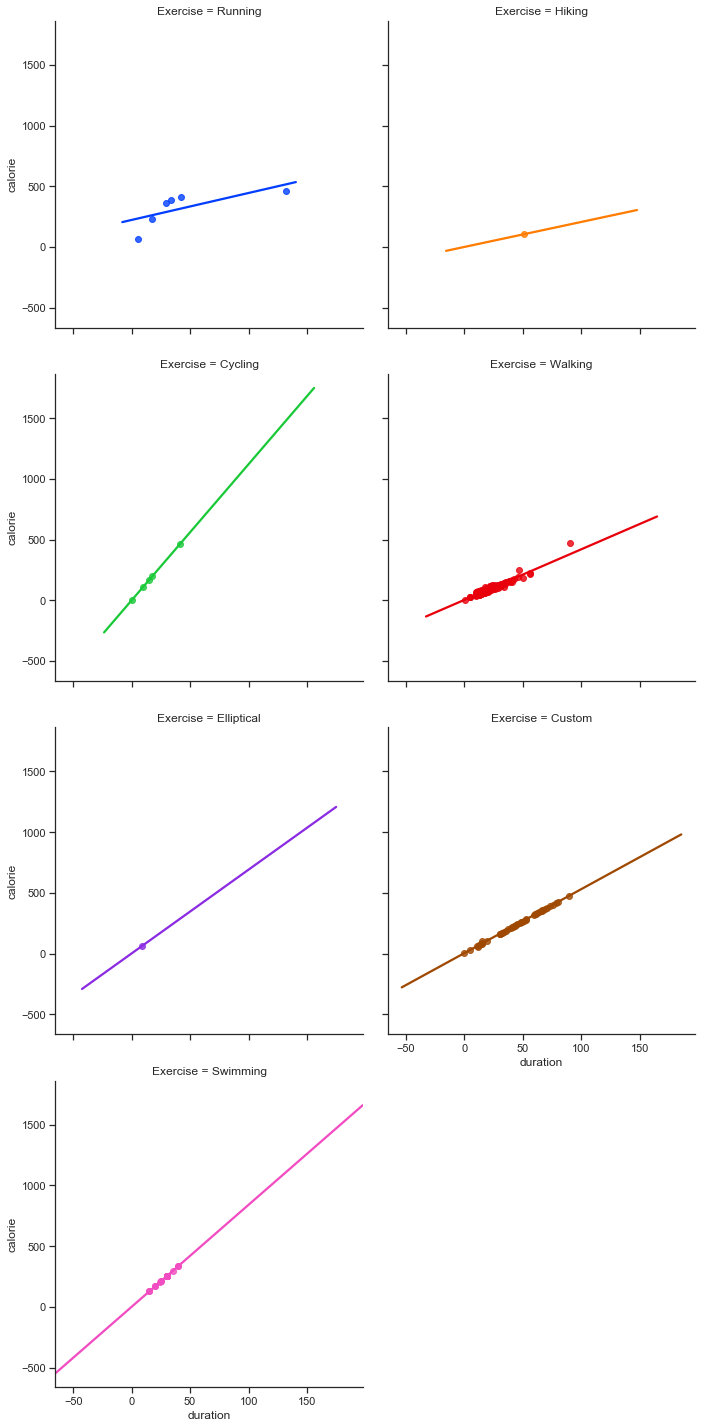

In [43]:
# linearity of  Calorie VS Duration for each exercise

sns.set(style="ticks")

sns.lmplot(x="duration", y="calorie", col="Exercise", hue="Exercise", data=Exercise_data,
           col_wrap=2, ci=None, palette="bright", height=5)

From the graphs above it can be seen that for all the exercises there is a linear relationship between the calories burned and the duration, except for running. 

Cycling has the greatest slope and walking has the lowest slope which was observed in the previous graphs. 


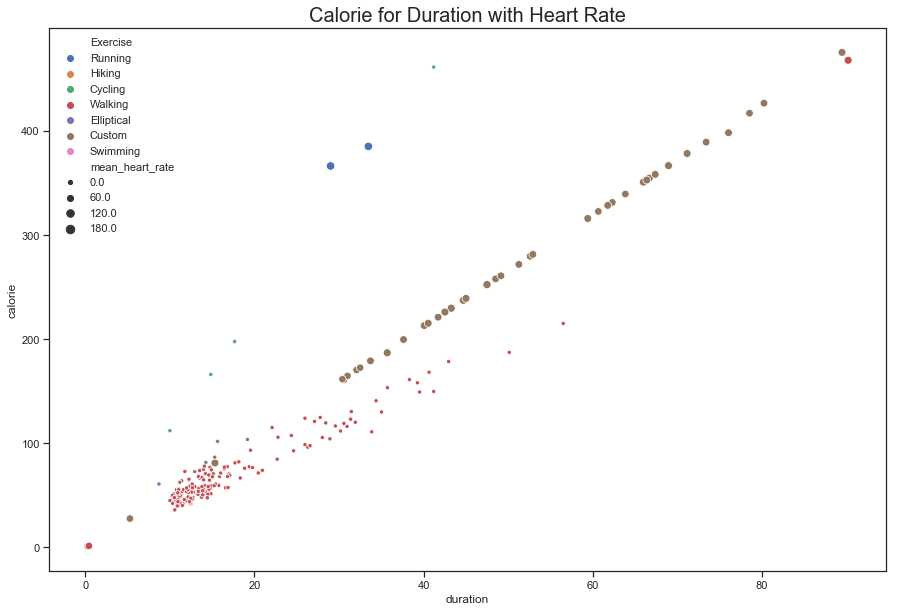

In [44]:
# Calorie VS duration and mean_heart rate 

sns.set(style="ticks")

plt.figure(figsize=(15,10))

plt.title('Calorie for Duration with Heart Rate', fontsize=20)

sns.scatterplot(x="duration", 
                y="calorie",
                hue="Exercise",
                size = 'mean_heart_rate',
                data=Exercise_data)

The graph above plots calorie on the y-axis, duration on the x-axis and the mean heart rate is the size of the markers. 

Note that some of the exercise do not appear beacuse not all exercises have mean heart rate values and some of the data does nto change size becasue the heart rate data is 0. 

As can be seen from the scatter plot, for most exercises the heart rate will increase as the duration and calories burned increases. The heart rate data for cycling is zero, there for the size does not change. 

It is interesting to note that for the custom exercise, the heart rate is always high no matter the duration of exercise and the calories burned. This is an indication that the custom workout gets the persons heart rate high everytime. The custom workout could be some sort of high intensity interval training. 


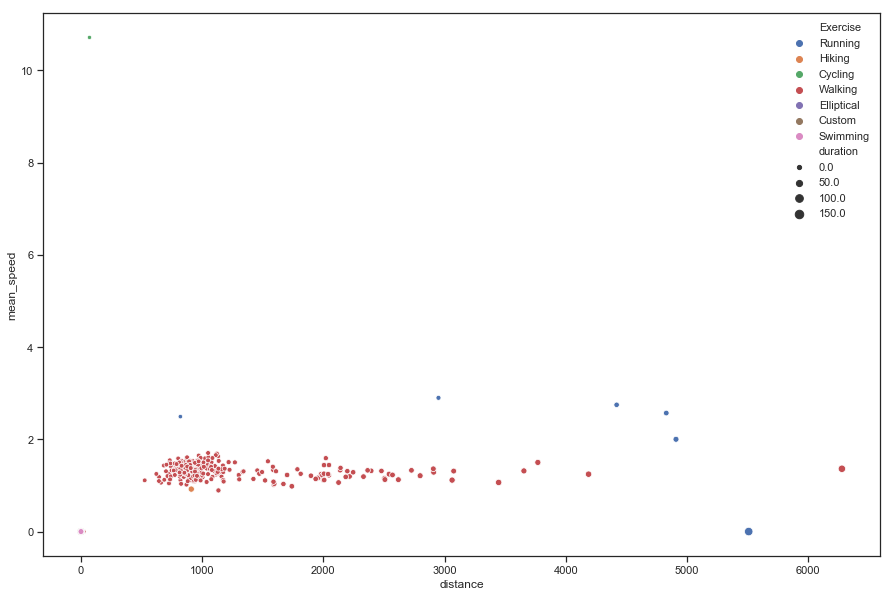

In [45]:
# Distance versus Speed 

sns.set(style="ticks")

plt.figure(figsize=(15,10))

sns.scatterplot(x="distance", 
                y="mean_speed",
                hue="Exercise",
                size = 'duration',
                data=Exercise_data)

The graph above plots the mean speed for the distance travelled and the size of the marker is duration. 

Note that there is only speed data for running, swimming and walking. The swimming speed is recored as 0 and there for can be omitted. 

For walking the persons speed is pretty consistent and is alway in between 1m/s and 2m/s even for long distances and long durations. 

The conclusion made before, that the running calorie and duration was not linear becasue the person would run slower for long distances is confirmed above. As can be seen as the running distance increases the speed decreases and duration increases showing that the person is running at a slower average pace. 

It is also interesting to note the that the person is actually running slower than they are walking when they are running for long durations. This shows that it may be more effective for him to run shorter durations, if speed, calorie burn and duration are important factors for him. 

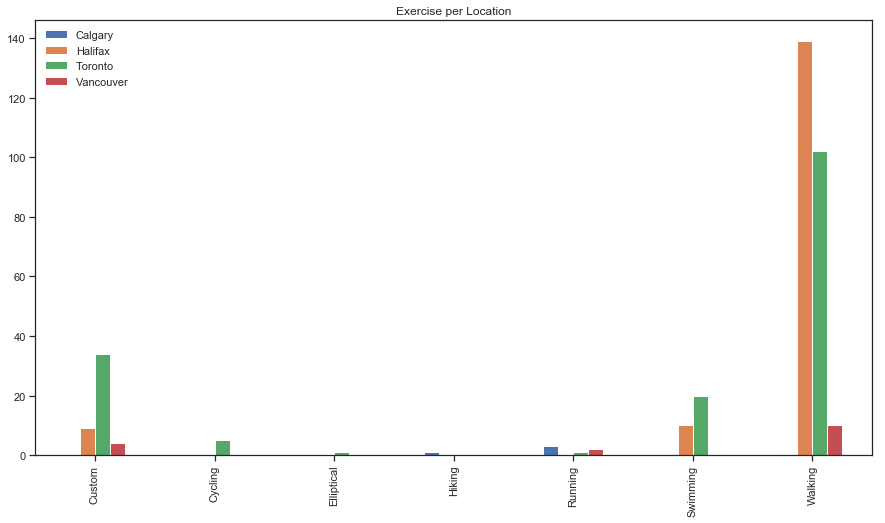

In [46]:
# exercise per location 

sns.set(style="ticks")

Calgary_Exercise = Exercise_data[Exercise_data.time_offset == 'Calgary Time'].groupby('Exercise').count()['end_time']
Halifax_Exercise = Exercise_data[Exercise_data.time_offset == 'Halifax Time'].groupby('Exercise').count()['end_time']
Toronto_Exercise = Exercise_data[Exercise_data.time_offset == 'Toronto Time'].groupby('Exercise').count()['end_time']
Vancouver_Exercise = Exercise_data[Exercise_data.time_offset == 'Vancouver Time'].groupby('Exercise').count()['end_time']



Time_Zone_Exercise_df = pd.DataFrame({ 'Calgary' : Calgary_Exercise,
                                       'Halifax'  : Halifax_Exercise,
                                       'Toronto'  : Toronto_Exercise,
                                       'Vancouver': Vancouver_Exercise,
                                       
                                     })

Time_Zone_Exercise_df.plot(kind = 'bar',figsize = (15,8),title = 'Exercise per Location')

From the data above, it can be shown that in Toronto time the person is the most diverse in his exercise types. He does all the exercises except for hiking when he is in Toronto time. This may be because in Toronto time he has the easiest access to different types of exercises. 

It is also interesting to note that the person does more of the difficult exercises when in Toronto time. Maybe something is motivating him to do more intense exercises, for example a workout buddy. 

The person tends to walk the most out of any exercise when he is in Halifax time. 

Text(0, 0.5, 'Exercise Count')

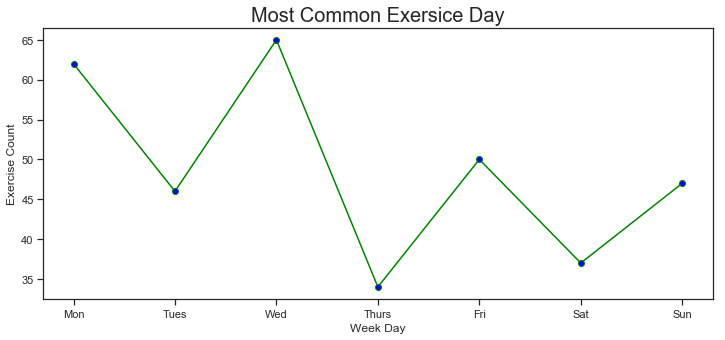

In [47]:
### find most comon exercise days 

# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Exercise_data.start_time.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Exercise = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Exercise' : Exercise_data.Exercise,

            })

Week_Day_Exercise = Week_Day_Exercise.groupby('Weekday').count()\
                    .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])


# plot 

sns.set(style="ticks")

plt.figure(figsize=(12,5))

plt.plot( Week_Day_Exercise.index,
          Week_Day_Exercise.Exercise,
          marker='o', 
          markerfacecolor='blue', 
          markersize=6, 
          color = 'green')

plt.title('Most Common Exersice Day',fontsize=20)
plt.xlabel('Week Day')
plt.ylabel('Exercise Count')


From the graph above it can be concluded that the person works out the most on Wednesday and Monday and the least on Thursday and Saturday. This is interesting because on Thursdays he also tends to wake up the earliest in the morning and sleep the most during the day. This disproves the above theory when analysing sleep data, that he is waking up early to exercise. 

It can be concluded that there is something interesting happening on Thursdays that is causing him to wake up early but it is likely not exercise. 

It can also be seen that he does not workout much on the weekend compared to the weekdays, excluding Thursdays, showing he likes to relax a bit more on the weekends. Next the most comon exercise per weekday will be found. 



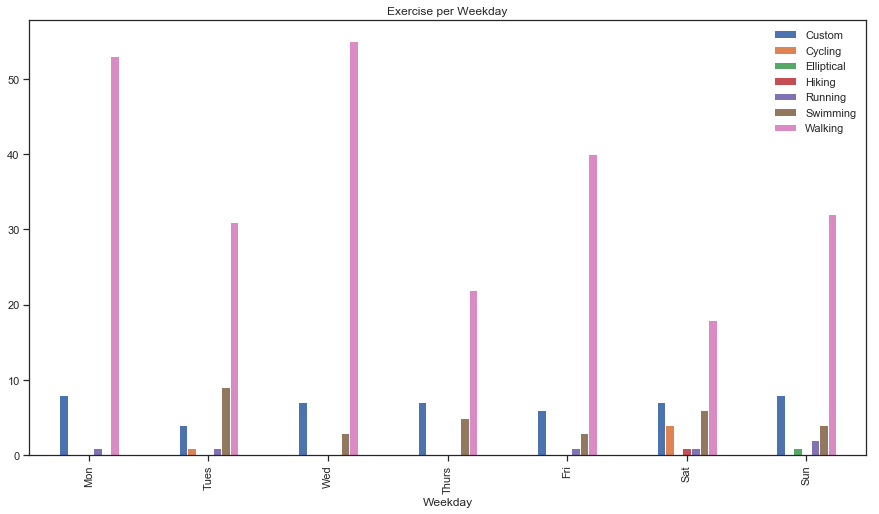

In [48]:
### find most comon exercise for each week day  

# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Exercise_data.start_time.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Exercise = pd.DataFrame(
            {
             'Weekday' : Week_Day,   
             'Exercise' : Exercise_data.Exercise

            })

# get values 

Weekday_Custom = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Custom'].groupby('Weekday').count()
Weekday_Cycling = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Cycling'].groupby('Weekday').count()
Weekday_Elliptical = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Elliptical'].groupby('Weekday').count()
Weekday_Hiking = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Hiking'].groupby('Weekday').count()
Weekday_Running = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Running'].groupby('Weekday').count()
Weekday_Swimming = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Swimming'].groupby('Weekday').count()
Weekday_Walking = Week_Day_Exercise[Week_Day_Exercise.Exercise == 'Walking'].groupby('Weekday').count()

# create merged data frame 

Week_Day_Exercise_sorted = pd.merge(Weekday_Custom,Weekday_Cycling, how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

Week_Day_Exercise_sorted =  pd.merge(Week_Day_Exercise_sorted,Weekday_Elliptical, how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

Week_Day_Exercise_sorted =  pd.merge(Week_Day_Exercise_sorted,Weekday_Hiking, how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

Week_Day_Exercise_sorted =  pd.merge(Week_Day_Exercise_sorted,Weekday_Running, how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

Week_Day_Exercise_sorted =  pd.merge(Week_Day_Exercise_sorted,Weekday_Swimming , how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

Week_Day_Exercise_sorted =  pd.merge(Week_Day_Exercise_sorted,Weekday_Walking , how = 'outer', 
                                    left_on = 'Weekday', right_on ='Weekday')

# insert new column names 

Week_Day_Exercise_sorted.columns = [ 'Custom','Cycling','Elliptical','Hiking','Running','Swimming','Walking']

# sort the days in order 

Week_Day_Exercise_sorted =  Week_Day_Exercise_sorted.reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

# plot

Week_Day_Exercise_sorted.plot(kind = 'bar',figsize = (15,8),title = 'Exercise per Weekday' )

In [49]:
Week_Day_Exercise_sorted 

,Custom,Cycling,Elliptical,Hiking,Running,Swimming,Walking
Weekday,,,,,,,
Mon,8,NaN,NaN,NaN,1.0,NaN,53
Tues,4,1.0,NaN,NaN,1.0,9.0,31
Wed,7,NaN,NaN,NaN,NaN,3.0,55
Thurs,7,NaN,NaN,NaN,NaN,5.0,22
Fri,6,NaN,NaN,NaN,1.0,3.0,40
Sat,7,4.0,NaN,1.0,1.0,6.0,18
Sun,8,NaN,1.0,NaN,2.0,4.0,32


Observing the bar plot above leads to the conclusion that the person does not do a particular exercise on a particular day. This shows that the person is willing to do any type of workout, no matter the week day. 

# Section 3 

<a id='Step_data'> </a>


### Step Count

<a href='#Top'>Back to Top </a>

In [50]:
Step_data = pd.read_csv('C:/Users/Amar/Python_Project/step_count.csv')

Step_data.drop(['Unnamed: 0', 'update_time','pkg_name','datauuid','create_time'],
              axis=1, inplace=True)

### convert time into date time objects 
Step_data['end_time'] = pd.to_datetime(Step_data['end_time'])
Step_data['start_time'] = pd.to_datetime(Step_data['start_time'])

##create time converter function 

#get the Time_shift data 

Time_shift = []

for i in Step_data['time_offset'] : 
    Time_shift.append(int(i[5]))


# Define a function that will convert the time 
# Note the data ranges between 2017 and 2018. 

def Time_Converter_3 (column_num):
    
    import datetime as dt

    Time_Data_Adjusted = []

    for j,x in enumerate(Step_data.iloc[:,column_num]): 
      
        if (x < pd.to_datetime('10/3/2019', format =  "%d/%m/%Y")) and (x > pd.to_datetime('10/11/2018', format =  "%d/%m/%Y")):
            # if x is less than March 10th 2019 and greater than November 10th 2018 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (x > pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x < pd.to_datetime('4/11/2018', format =  "%d/%m/%Y")):
            # if x is greater than March 11th 2018 and less than November 4th 2018 - do not add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
       
        elif(x < pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x > pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is less than March 11th 2018 and greater than November 5th 2017 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
    
        elif(x > pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x < pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is greater than March 12th 2017 and less than November 5th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
        
        elif(x < pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x > pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
           # if x is less than March 12th 2017 and greater than November 6th 2016 - add an hour for DayLight Savings
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (Time_shift[j] == 5):
            # if time zone is in UTC +0530 
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num] + dt.timedelta(hours= 5.5)))
          
        else :
            Time_Data_Adjusted.append((Step_data.iloc[j,column_num]))
    
    return Time_Data_Adjusted

# Adjust Time Data uing function above 

Step_data['end_time'] = Time_Converter_3(0)
Step_data['start_time'] = Time_Converter_3(1)

# make time offset into readalbe Time Zones 

Time_Zone = []

for j,x in enumerate(Step_data['time_offset']): 
        
    if Step_data.iloc[j,5] == 'UTC-0300':
        Time_Zone.append('Halifax Time')

Step_data.time_offset = Time_Zone 

#get info for the date only 
Step_data["DATE"] = Step_data.start_time.dt.date
Step_data.head()

# Sort the date in order 

Step_data = Step_data.sort_values('start_time').reset_index(drop='True')

Step_data.head()



,end_time,start_time,count,calorie,speed,time_offset,distance,DATE
0,2018-03-31 04:01:59.999,2018-03-31 04:01:00,21,0.87,1.472222,Halifax Time,14.89,2018-03-31
1,2018-03-31 04:03:59.999,2018-03-31 04:03:00,17,0.70,2.111111,Halifax Time,14.25,2018-03-31
2,2018-03-31 04:04:59.999,2018-03-31 04:04:00,22,0.90,1.638889,Halifax Time,15.41,2018-03-31
3,2018-03-31 04:15:59.999,2018-03-31 04:15:00,17,0.65,1.111111,Halifax Time,10.03,2018-03-31
4,2018-03-31 04:16:59.999,2018-03-31 04:16:00,10,0.42,1.805556,Halifax Time,7.67,2018-03-31


The 'count' column is supossed to represent the number of steps the person had. The step count seems very low. Also the start time and end time have a difference of a mintue every time. Note that Speed is in  meters per second and distance is in m. Also note that the duration, distance, count and calorie are very small values. This shows that the step device was only actived for small peroiods of the day or the data is not fully accurate. The best way to check is to group by the date and sum the values, except for speed, which would be more accurate to find the mean. 

<a id='Step_Analysis'></a>




### Step Data Analysis and Visualization 

<a href='#Top'>Back to Top </a>

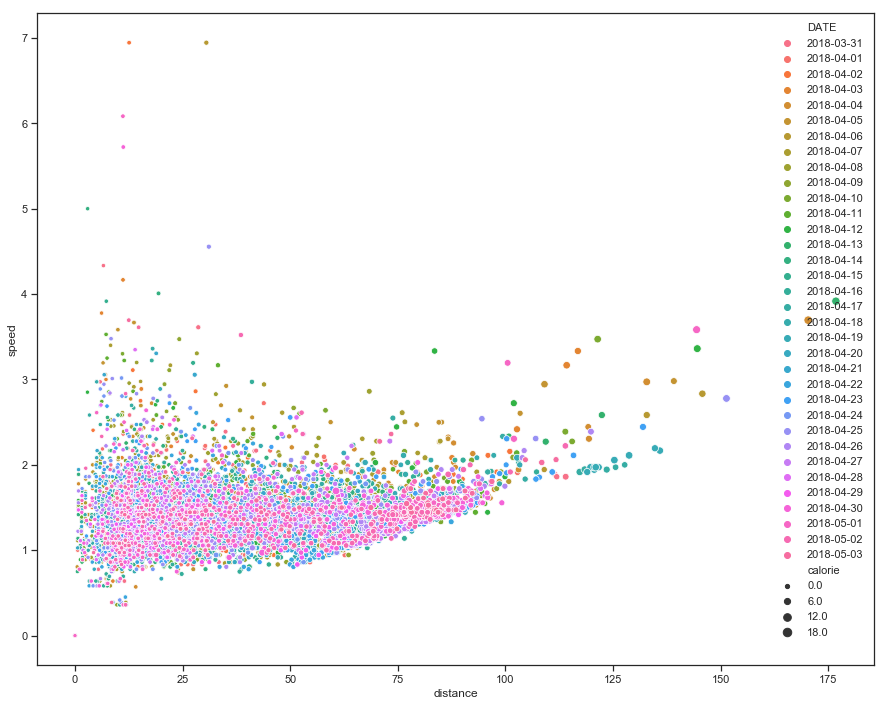

In [51]:
# Distance versus Speed, size calorie 

sns.set(style="ticks")

plt.figure(figsize=(15,12))


sns.scatterplot(x="distance", 
                y="speed",
                hue='DATE',
                size = 'calorie',
                data=Step_data)

The above graph shows the speed for every distance walking and the marker size is the amount of calories burned. 

First off, it is important to note that the data has multiple entries for each day, so the graph shows the characteristics of every data entry grouped by the day. 

The majority of the data has a speed above 0.5 m/s to 3 m/s all though there are some outliers and his/her speed can reach up to 7 m/s. 

As can be seen from the graph, as the person increases their distance, there calories burned increases. It also interesting to note that as the speed increases the calories burned does not increase much.There seems to be a correlation but it is not as strong as caloires burned for distance travelled. This is most likely the case becuase the average range of speed only differs by 1 to 2 m/s. 

Therefore, it can be concluded that if the person is looking to loose more calories, he/she should focus on walking a greater distance instead of focusing on walking faster. 




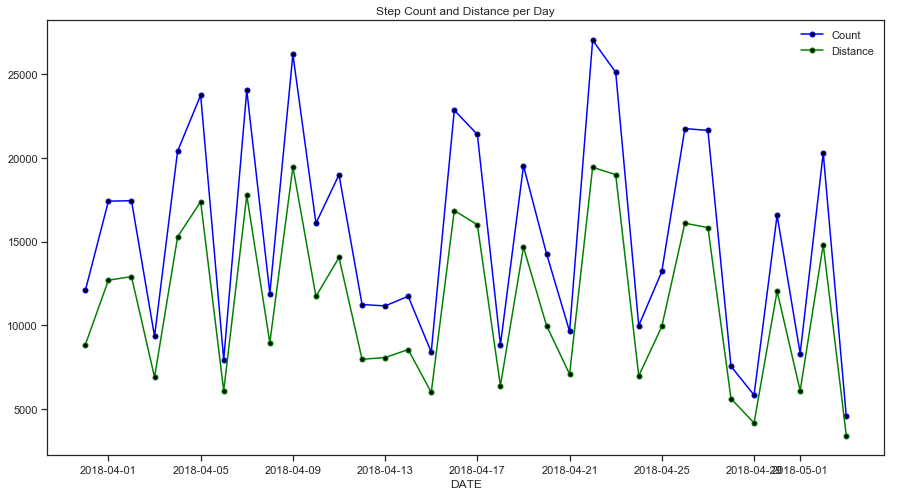

In [52]:
# get the sum of the steps per day 

Step_sum = Step_data.groupby('DATE').sum()
Step_sum.head()

# create a data frame 
Step_count_distance_df = pd.DataFrame({ 'Count' : Step_sum['count'],
                                        'Distance' : Step_sum.distance                                 
                                     })

#plot 

sns.set(style="ticks")
ax1 = Step_count_distance_df.plot(figsize = (15,8),
                                  title = 'Step Count and Distance per Day',
                                  color = ['blue','green'],
                                   marker='o', 
                                  markerfacecolor='black', 
                                  markersize=5, 
                                 )


From the graphs above it is clear to see the that the total amount of steps per day and the distance travelled per day fluctuates and is not very consitent. To find any patterns, the data will be analysed when grouped by weekday. This graph also confirms that the step count and distance are strongly correlated, which logically makes sense. 

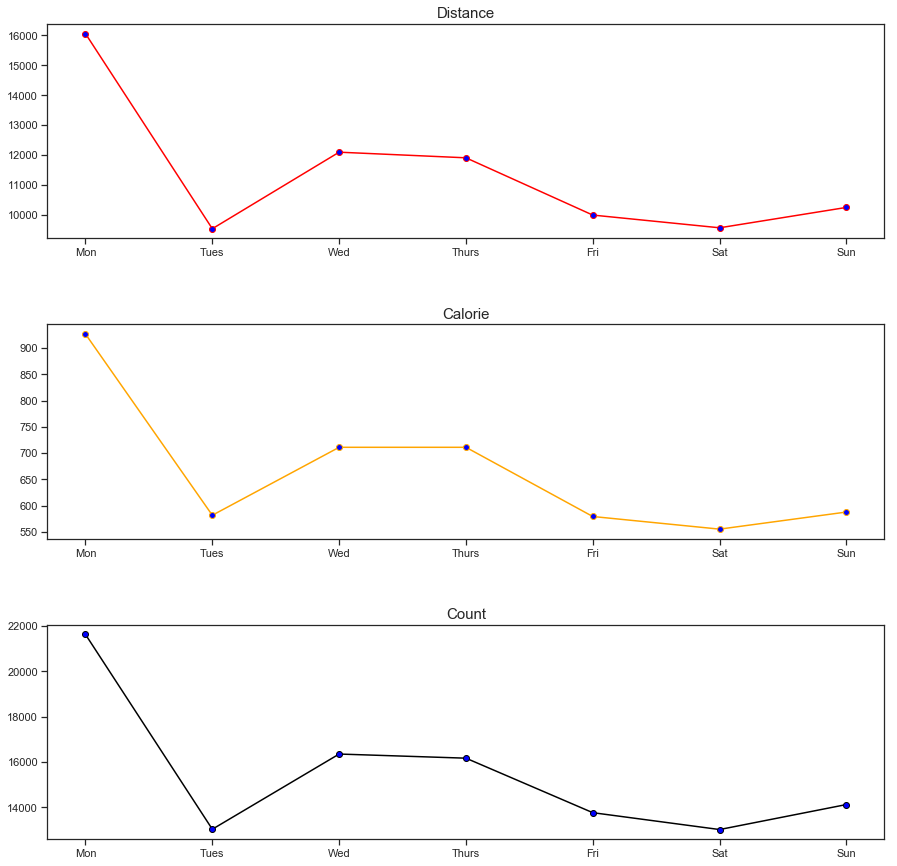

In [53]:
### find distance per day of week   

# note: to find an accurate mean for values for each day of the week, the data must be summed by day first. 

Step_sum = Step_data.groupby('DATE').sum().reset_index()

Step_sum['DATE'] = pd.to_datetime(Step_sum.DATE)


# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Step_sum.DATE.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
               
#get info on week day VS duration 
        
Week_Day_Step = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Distance' : Step_sum.distance,
             'Calorie'  : Step_sum.calorie,
             'Count'    : Step_sum['count'],
            })

Week_Day_Step = Week_Day_Step.groupby('Weekday').mean()\
                   .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])


# plot 

plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.4,hspace=0.4)

plt.subplot(311)
plt.title('Distance',fontsize = 15)


plt.plot( Week_Day_Step.index,
          Week_Day_Step['Distance'],
          marker='o', 
          markerfacecolor='blue', 
          markersize=6, 
          color = 'red')

plt.subplot(312)
plt.title('Calorie',fontsize = 15)


plt.plot( Week_Day_Step.index,
          Week_Day_Step['Calorie'],
          marker='o', 
          markerfacecolor='blue', 
          markersize=6, 
          color = 'orange',)

plt.subplot(313)
plt.title('Count',fontsize = 15)


plt.plot( Week_Day_Step.index,
          Week_Day_Step['Count'],
          marker='o', 
          markerfacecolor='blue', 
          markersize=6, 
          color = 'black')


From the graphs above, it can be seen that distance, Calorie and Count are tightly corelated. 

Also from the data, the person tneds to walk the most on the week days and not as much on the weekends, exluding Tuesdays where the person walks the least, showing he is more active on the weekdays. The person usaully gets the most steps on Mondays and by a large amount, showing that the person tends to walk alot on Mondays. 

It can be seen that on Thursday, he is tneds to walk a relatively deccent amount, which therefore shows he is fairly active on Thurdays. This is interesting becasue in the Exercise Data analysis, the data shows he works out the least on Thursdays. Also from the Sleep data Analysis he also wakes up the earliest and sleeps the most on Thursdays nights which aligns with the fact that he is more active on Thursdays.What he is doing on Thursdays that is keeping him active is still a mystery. 



# Section 4 

<a id='Heart_data'></a>


### Heart Rate Data 

<a href='#Top'>Back to Top </a>

In [54]:
##### importing and cleaning heart rate data 

Heart_data = pd.read_csv('C:/Users/Amar/Python_Project/heart_rate.csv')

Heart_data.drop (['Unnamed: 0','binning_data','pkg_name','datauuid','create_time','update_time'],
                axis=1, inplace =True)

### convert time into date time objects 
Heart_data['end_time'] = pd.to_datetime(Heart_data['end_time'])
Heart_data['start_time'] = pd.to_datetime(Heart_data['start_time'])

##create time converter function 

#get the Time_shift data 

Time_shift = []

for i in Heart_data['time_offset'] : 
    Time_shift.append(int(i[5]))


# Define a function that will convert the time 
# Note the data ranges between 2016 and 2018. 

def Time_Converter_4 (column_num):
    
    import datetime as dt

    Time_Data_Adjusted = []

    for j,x in enumerate(Heart_data.iloc[:,column_num]): 
      
        if (x < pd.to_datetime('10/3/2019', format =  "%d/%m/%Y")) and (x > pd.to_datetime('10/11/2018', format =  "%d/%m/%Y")):
            # if x is less than March 10th 2019 and greater than November 10th 2018 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (x > pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x < pd.to_datetime('4/11/2018', format =  "%d/%m/%Y")):
            # if x is greater than March 11th 2018 and less than November 4th 2018 - do not add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
       
        elif(x < pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x > pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is less than March 11th 2018 and greater than November 5th 2017 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
    
        elif(x > pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x < pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is greater than March 12th 2017 and less than November 5th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
        
        elif(x < pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x > pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
           # if x is less than March 12th 2017 and greater than November 6th 2016 - add an hour for DayLight Savings
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (Time_shift[j] == 5):
            # if time zone is in UTC +0530 
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num] + dt.timedelta(hours= 5.5)))
          
        else :
            Time_Data_Adjusted.append((Heart_data.iloc[j,column_num]))
    
    return Time_Data_Adjusted

# Adjust Time Data uing function above 

Heart_data['end_time'] = Time_Converter_4(0)
Heart_data['start_time'] = Time_Converter_4(2)

# make time offset into readalbe Time Zones 

Time_Zone = []

for j,x in enumerate(Heart_data['time_offset']): 
    if Heart_data.iloc[j,6] == 'UTC-0400':
        Time_Zone.append('Toronto Time')
        
    if Heart_data.iloc[j,6] == 'UTC-0300':
        Time_Zone.append('Halifax Time')
        
    if Heart_data.iloc[j,6] == 'UTC-0600':
        Time_Zone.append('Calgary Time')
   
    if Heart_data.iloc[j,6] == 'UTC-0700':
        Time_Zone.append('Vancouver Time')
    
    if Heart_data.iloc[j,6] == 'UTC+0530':
        Time_Zone.append('India Time')

Heart_data.time_offset = Time_Zone 

#get info for the date only 
Heart_data["DATE"] = Heart_data.start_time.dt.date


# Sort the date in order 

Heart_data = Heart_data.sort_values('start_time').reset_index(drop='True')

#remove two columns from 1969 
Heart_data = Heart_data.iloc[2:,:].reset_index(drop='True')

Heart_data.head()

,end_time,heart_rate,start_time,heart_beat_count,max,min,time_offset,DATE
0,2016-06-09 20:11:09.456,52.0,2016-06-09 20:11:04.783,0,NaN,NaN,India Time,2016-06-09
1,2016-06-10 09:35:36.753,76.0,2016-06-10 09:35:33.590,0,NaN,NaN,India Time,2016-06-10
2,2016-06-11 06:59:38.666,61.0,2016-06-11 06:59:15.020,0,NaN,NaN,India Time,2016-06-11
3,2016-06-11 13:08:31.311,66.0,2016-06-11 13:08:27.445,0,NaN,NaN,India Time,2016-06-11
4,2016-06-13 11:34:58.623,61.0,2016-06-13 11:34:18.535,0,NaN,NaN,India Time,2016-06-13


In [55]:
Heart_data.groupby('DATE').mean()

,heart_rate,heart_beat_count,max,min
DATE,,,,
2016-06-09,52.000000,0.000000,NaN,NaN
2016-06-10,76.000000,0.000000,NaN,NaN
2016-06-11,63.500000,0.000000,NaN,NaN
2016-06-13,61.000000,0.000000,NaN,NaN
2016-06-14,61.000000,0.000000,NaN,NaN
2016-06-17,71.000000,0.000000,NaN,NaN
2016-06-19,62.000000,0.000000,NaN,NaN
2016-06-23,60.000000,0.000000,NaN,NaN
2016-07-03,68.000000,0.000000,NaN,NaN


Note that the data is only given for 63 days and the days are random, not consecutive. 

<a id='Heart_Analysis'></a>




### Heart Data Analysis and Visualization

<a href='#Top'>Back to Top </a>

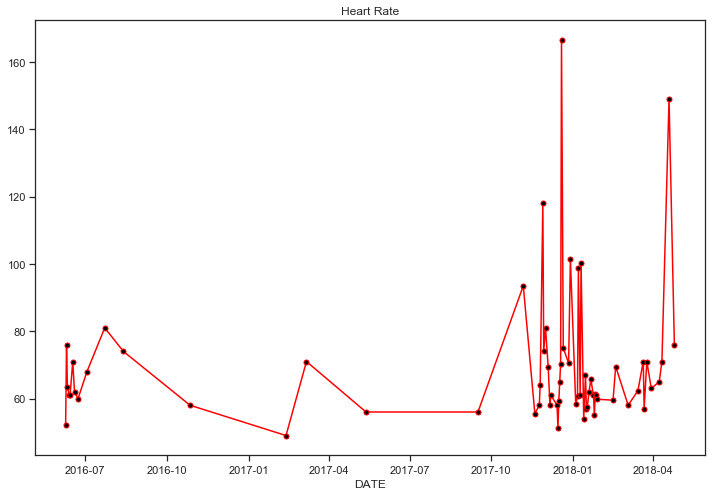

In [56]:
Heart_data.groupby("DATE").mean()['heart_rate'].plot(figsize = (12,8),
                                                     title = 'Heart Rate',
                                                     marker='o', 
                                                     markerfacecolor='black', 
                                                     markersize=5, 
                                                     color = 'red')

There seems to be more fluctuations in heart beat around the end of 2017 and the begining of 2018. This may be becasue there are more data points during this time. To investigate further, the mean heart for the day of the week will be plotted.  

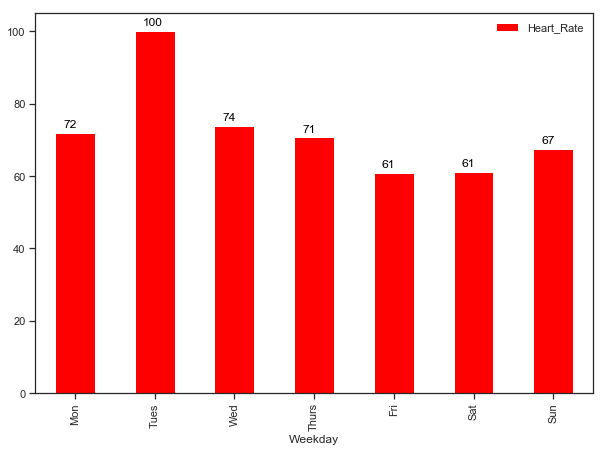

In [57]:
### find heart rate  per week day  

# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Heart_data.start_time.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Heart = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Heart_Rate' : Heart_data.heart_rate

            })

# find mean and reset index
Week_Day_Heart = Week_Day_Heart.groupby('Weekday').mean()\
                   .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

# round mean Heart rate to display on graph 
Mean_Heart_Rate = []

for i in Week_Day_Heart.Heart_Rate : 
    Mean_Heart_Rate.append(round(i))

# plot 
ax1 = Week_Day_Heart.plot(kind = 'bar',
                    figsize=(10,7),
                    color='red')


#display values on graph 

for x,i in enumerate(ax1.patches):
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+.10,
            i.get_height()+1.5,
            str( Mean_Heart_Rate[x]), 
            fontsize=12,
                color='black')

From the bar plot of mean heart rate for every day of the week, it is clear to see that Tuesday has the highest mean heart rate. The  person tends to have a higher heart rate during the weekdays, except for Friday. This is consitent with the previous conclusions that the person tends to be more active on the weekdays compared to the weekends. 

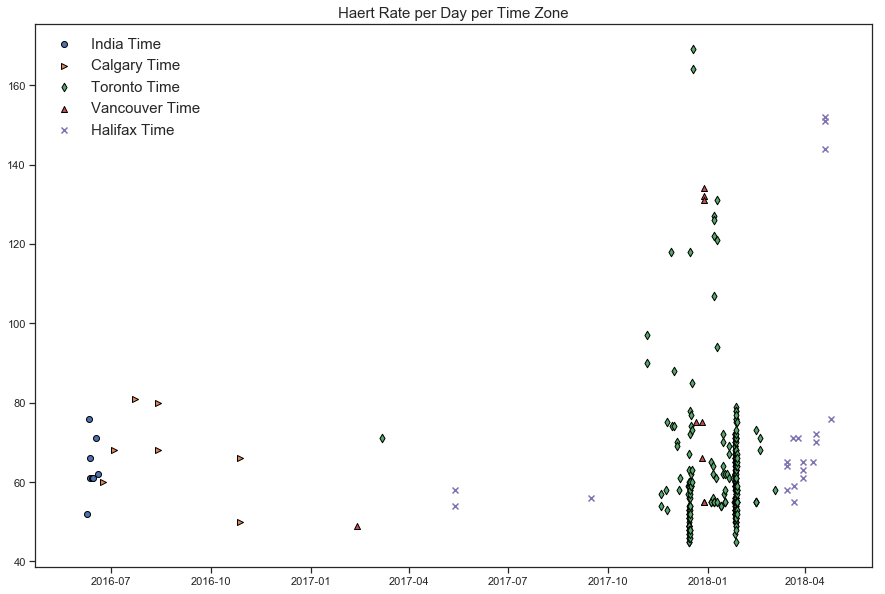

In [58]:
# plot heart rate for location 

plt.figure(figsize=(15,10))

plt.title('Haert Rate per Day per Time Zone',fontsize = 15)


          
plt.scatter(list(Heart_data[Heart_data.time_offset == 'India Time'].DATE),
            Heart_data[Heart_data.time_offset == 'India Time'].heart_rate,
            marker ='o',label='India Time',edgecolors='black')

plt.scatter(list(Heart_data[Heart_data.time_offset == 'Calgary Time'].DATE),
            Heart_data[Heart_data.time_offset == 'Calgary Time'].heart_rate,
            marker ='>',label='Calgary Time',edgecolors='black')

plt.scatter(list(Heart_data[Heart_data.time_offset == 'Toronto Time'].DATE),
            Heart_data[Heart_data.time_offset == 'Toronto Time'].heart_rate,
            marker ='d',label='Toronto Time',edgecolors='black')


plt.scatter(list(Heart_data[Heart_data.time_offset == 'Vancouver Time'].DATE),
            Heart_data[Heart_data.time_offset == 'Vancouver Time'].heart_rate,
            marker ='^',label='Vancouver Time',edgecolors='black')

plt.scatter(list(Heart_data[Heart_data.time_offset == 'Halifax Time'].DATE),
            Heart_data[Heart_data.time_offset == 'Halifax Time'].heart_rate,
            marker ='x',label='Halifax Time',edgecolors='black')

plt.legend(('India Time', 'Calgary Time','Toronto Time','Vancouver Time','Halifax Time'),
           loc='upper left',
           fontsize=15)
plt.show()



From the data it can be seen that the person has the highest heart rate when in Tornoto. This could be becasue he is doing a more intense workout when in Toronto, as concluded in the Exercise Data Analysis. 

The person tends to have a lower heart rate when in India Time and in Calagary Time. This could be becuase he is on Vacation when in these time zones and therefore is exercising less, walking less and less active.  

When in Halifax time, which is the most common place the data comes from, he seems to have a relatively calm heart except for a few outliers. 

# Section 5 

<a id='Floors_data'></a>




### Floors Climbed Data

<a href='#Top'>Back to Top </a>

In [59]:
Floors_data = pd.read_csv('C:/Users/Amar/Python_Project/floors_climbed.csv')

Floors_data.drop(['Unnamed: 0','pkg_name','datauuid','update_time','create_time'],
                axis =1, inplace = True)

### convert time into date time objects 
Floors_data['end_time'] = pd.to_datetime(Floors_data['end_time'])
Floors_data['start_time'] = pd.to_datetime(Floors_data['start_time'])

##create time converter function 

#get the Time_shift data 

Time_shift = []

for i in Floors_data['time_offset'] : 
    Time_shift.append(int(i[5]))


# Define a function that will convert the time 
# Note the data ranges between 2017 and 2018. 

def Time_Converter_5 (column_num):
    
    import datetime as dt

    Time_Data_Adjusted = []

    for j,x in enumerate(Floors_data.iloc[:,column_num]): 
      
        if (x < pd.to_datetime('10/3/2019', format =  "%d/%m/%Y")) and (x > pd.to_datetime('10/11/2018', format =  "%d/%m/%Y")):
            # if x is less than March 10th 2019 and greater than November 10th 2018 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (x > pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x < pd.to_datetime('4/11/2018', format =  "%d/%m/%Y")):
            # if x is greater than March 11th 2018 and less than November 4th 2018 - do not add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
       
        elif(x < pd.to_datetime('11/3/2018', format =  "%d/%m/%Y")) and (x > pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is less than March 11th 2018 and greater than November 5th 2017 - add an hour for DayLight Savings 
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
    
        elif(x > pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x < pd.to_datetime('5/11/2017', format =  "%d/%m/%Y")):
            # if x is greater than March 12th 2017 and less than November 5th 2017 - do not add an hour for DayLight Savings
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j])))
        
        elif(x < pd.to_datetime('12/3/2017', format =  "%d/%m/%Y")) and (x > pd.to_datetime('6/11/2016', format =  "%d/%m/%Y")):
           # if x is less than March 12th 2017 and greater than November 6th 2016 - add an hour for DayLight Savings
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] - dt.timedelta(hours= Time_shift[j]+1)))
        
        elif (Time_shift[j] == 5):
            # if time zone is in UTC +0530 
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num] + dt.timedelta(hours= 5.5)))
          
        else :
            Time_Data_Adjusted.append((Floors_data.iloc[j,column_num]))
    
    return Time_Data_Adjusted

# Adjust Time Data uing function above 

Floors_data['end_time'] = Time_Converter_5(0)
Floors_data['start_time'] = Time_Converter_5(2)

# make time offset into readalbe Time Zones 

Time_Zone = []

for j,x in enumerate(Floors_data['time_offset']): 
    if Floors_data.iloc[j,1] == 'UTC-0400':
        Time_Zone.append('Toronto Time')
        
    if Floors_data.iloc[j,1] == 'UTC-0300':
        Time_Zone.append('Halifax Time')
        
    if Floors_data.iloc[j,1] == 'UTC-0600':
        Time_Zone.append('Calgary Time')
   
    if Floors_data.iloc[j,1] == 'UTC-0700':
        Time_Zone.append('Vancouver Time')

Floors_data.time_offset = Time_Zone 

#get date info only 
Floors_data["DATE"] = Floors_data.start_time.dt.date


# Sort the date in order 

Floors_data = Floors_data.sort_values('start_time').reset_index(drop='True')


Floors_data.head()

,end_time,time_offset,start_time,floor,DATE
0,2017-12-16 03:48:18,Toronto Time,2017-12-16 03:46:12,9.0,2017-12-16
1,2017-12-16 06:28:23,Toronto Time,2017-12-16 06:28:13,1.0,2017-12-16
2,2017-12-17 12:48:36,Toronto Time,2017-12-17 12:46:26,9.0,2017-12-17
3,2017-12-18 03:16:28,Toronto Time,2017-12-18 03:12:32,6.0,2017-12-18
4,2017-12-18 04:15:38,Toronto Time,2017-12-18 04:15:09,1.0,2017-12-18


<a id='Floors_Analysis'></a>


### Floors Data Analysis and Visualization 

<a href='#Top'>Back to Top </a>

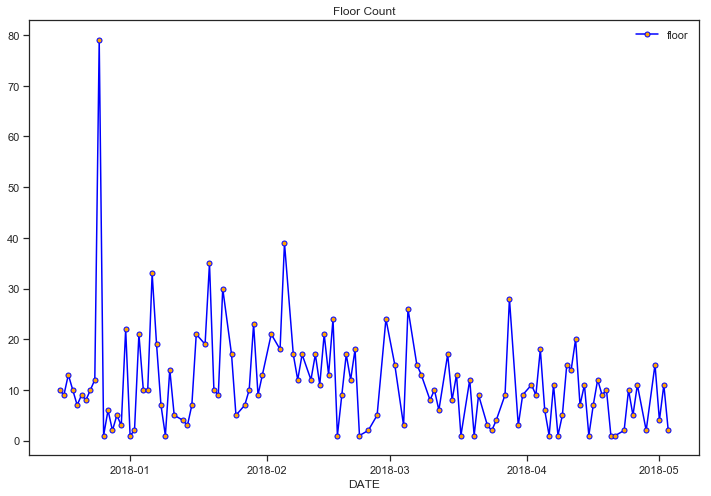

In [60]:
Floors_data.groupby('DATE').sum().plot(figsize = (12,8),
                                       title = 'Floor Count',
                                       marker='o', 
                                       markerfacecolor='orange', 
                                       markersize=5, 
                                       color = 'blue')


In [61]:
# mean floors per day 

np.mean(Floors_data.groupby('DATE').sum())


floor    11.382609
dtype: float64

The Data shows that the person climbs from 0 to 40 floors per day over this time period, exluding the outlier when the person climbs 80 floors. The amount of floors the person climbs is is pretty inconsitent over time.

Also the perons climbs 11 floors per day on average in this time period which is a decent amount. 

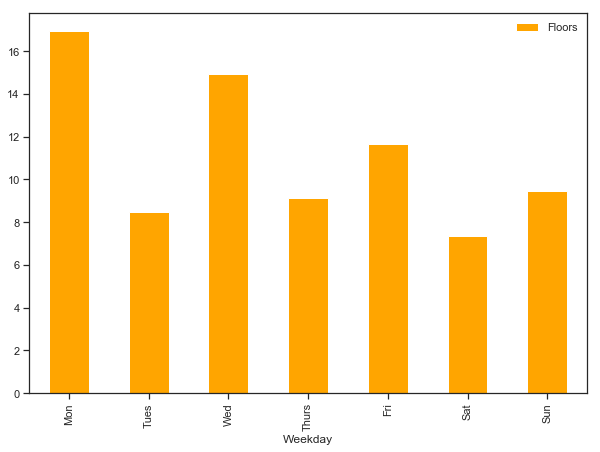

In [62]:
### find floor count  per day of week  

#sum all the floors for every day

Floors_sum = Floors_data.groupby('DATE').sum().reset_index()

Floors_sum['DATE'] = pd.to_datetime(Floors_sum.DATE)

# make value from 0 to 6 equalt to monday to sunday 
Week_Day = []
for i in Floors_sum.DATE.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')
        
#get info on week day VS duration 
        
Week_Day_Floor = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Floors' :Floors_sum.floor

            })


Week_Day_Floor = Week_Day_Floor.groupby('Weekday').mean()\
                   .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])



# plot 
ax1 = Week_Day_Floor.plot(kind = 'bar',
                    figsize=(10,7),
                    color='orange')


It can be observed that the person climbs the highest amount of steps on Mondays. This is an interesting observation because from the Steps Analysis he had the most steps on Monday. This confirms that the person tends to be very active on Mondays. 

The person climbs the least amount of steps on Saturday which agrees with the conclusion that the person is the least active on Saturday. 

There seems to be a pattern where every other day the person climbs less than before. There could be varrying reasons for why the person does this. 

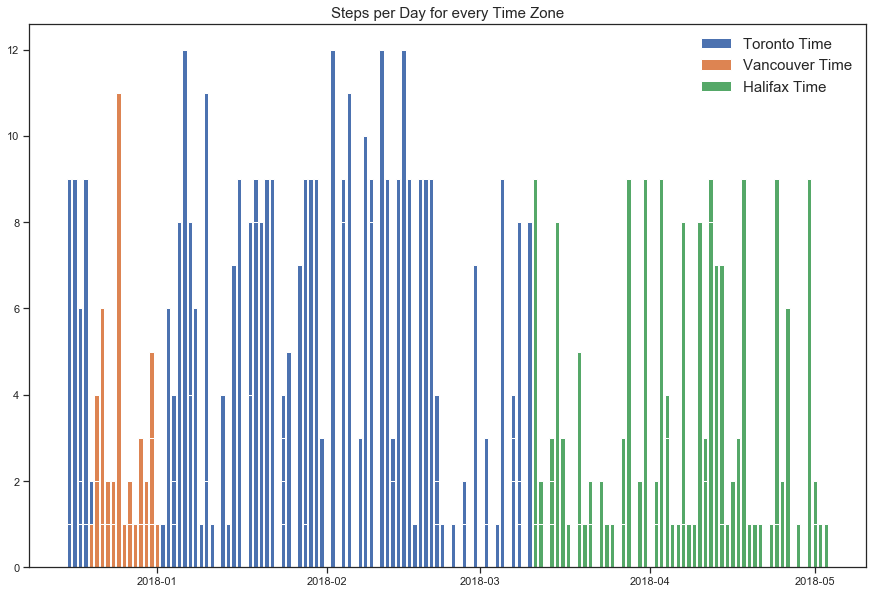

In [63]:
plt.figure(figsize=(15,10))

plt.title('Steps per Day for every Time Zone',fontsize = 15)


          
plt.bar(list(Floors_data[Floors_data.time_offset == 'Toronto Time'].DATE),
            Floors_data[Floors_data.time_offset == 'Toronto Time'].floor)

plt.bar(list(Floors_data[Floors_data.time_offset == 'Vancouver Time'].DATE),
            Floors_data[Floors_data.time_offset == 'Vancouver Time'].floor)

plt.bar(list(Floors_data[Floors_data.time_offset == 'Halifax Time'].DATE),
            Floors_data[Floors_data.time_offset == 'Halifax Time'].floor)


plt.legend(('Toronto Time','Vancouver Time','Halifax Time'),
           loc='upper right',
           fontsize=15)
plt.show()

The person seems to climb more floors on average when in Toronto time. The person climbs less floors when in Vancouver time and when in Halifax time except for one outlier in Vancouver time when the person climbed 11 floors. 

This data further shows that the person tends to be more active when in Toronto. 

# Section 6 

<a id='Final_data'></a>



### Final Data 

<a href='#Top'>Back to Top </a>

In [64]:
# combine the Exercise date and Sleep data with no naps for accuracy 
Combined_data = pd.merge(left = Sleep_df_no_nap, right = Exercise_data, how='inner', left_on = 'DATE',right_on = 'DATE')

Combined_data.drop(['altitude_loss','max_altitude','count','altitude_gain','incline_distance',
                    'decline_distance','min_altitude','count_type','time_offset_y' ],axis=1,inplace=True)


Combined_data.shape

(383, 20)

In [65]:
Combined_data_sum = Combined_data.groupby('DATE').sum()
Combined_data_sum.shape

(111, 13)

In [66]:
# time woke up VS time worked out 

# make value from 0 to 6 equal to monday to sunday 
Week_Day = []
for i in Combined_data.start_time.dt.weekday:
    if i == 0:
        Week_Day.append('Mon')
    if i == 1:
        Week_Day.append('Tues')
    if i == 2:       
        Week_Day.append('Wed')
    if i == 3:        
        Week_Day.append('Thurs')
    if i == 4:
        Week_Day.append('Fri')
    if i == 5:
        Week_Day.append('Sat')
    if i == 6:
        Week_Day.append('Sun')

Combined_data['week_day'] = Week_Day

Combined_data['Wake_Up_Hour'] = Combined_data.End_Time_Adjusted.dt.hour

Combined_data['Exercise_Hour'] = Combined_data.start_time.dt.hour

Week_Day_Combined = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Wake_Up_Hour' : Combined_data.End_Time_Adjusted.dt.hour,
             'Exercise_Hour'  : Combined_data.start_time.dt.hour,
             'Sleep_Duration_Hours'    : Combined_data.Sleep_Duration_Hours,
             'Efficiency'    : Combined_data.Efficiency,
             'Exercise_Duration' : Combined_data.duration,
             'mean_heart_rate' : Combined_data.mean_heart_rate,
             'calorie': Combined_data.calorie,
             'distance':Combined_data.distance,
             

            })

Week_Day_Combined_mean = Week_Day_Combined.groupby('Weekday').mean()\
                   .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

Week_Day_Combined_mean


,Wake_Up_Hour,Exercise_Hour,Sleep_Duration_Hours,Efficiency,Exercise_Duration,mean_heart_rate,calorie,distance
Weekday,,,,,,,,
Mon,5.764706,8.676471,5.346078,78.382353,18.656765,23.413043,89.019397,920.142191
Tues,5.586957,9.500000,6.487681,93.021739,20.495000,12.347826,120.206391,861.250400
Wed,4.851351,10.067568,6.186712,82.527027,18.932162,15.720000,96.537513,789.030897
Thurs,5.500000,7.736842,6.120175,91.868421,21.385263,33.913043,116.355790,888.239108
Fri,6.295082,7.688525,6.281421,92.213115,26.130328,19.666667,123.868065,1379.523557
Sat,6.527778,7.333333,6.238889,90.472222,28.817500,36.440000,179.907556,609.952129
Sun,6.283333,7.250000,5.403333,82.583333,26.367167,36.289474,139.803000,974.795286


In [67]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 0 to 382
Data columns (total 23 columns):
Start_Time_Adjusted     383 non-null datetime64[ns]
End_Time_Adjusted       383 non-null datetime64[ns]
Sleep_Duration_Hours    383 non-null float64
time_offset_x           383 non-null object
Efficiency              383 non-null int64
DATE                    383 non-null object
sleep_hour              383 non-null int64
end_time                383 non-null datetime64[ns]
start_time              383 non-null datetime64[ns]
duration                383 non-null float64
max_heart_rate          241 non-null float64
mean_heart_rate         241 non-null float64
max_cadence             241 non-null float64
max_speed               280 non-null float64
calorie                 383 non-null float64
mean_cadence            241 non-null float64
mean_speed              370 non-null float64
min_heart_rate          241 non-null float64
distance                370 non-null float64
Exercise          

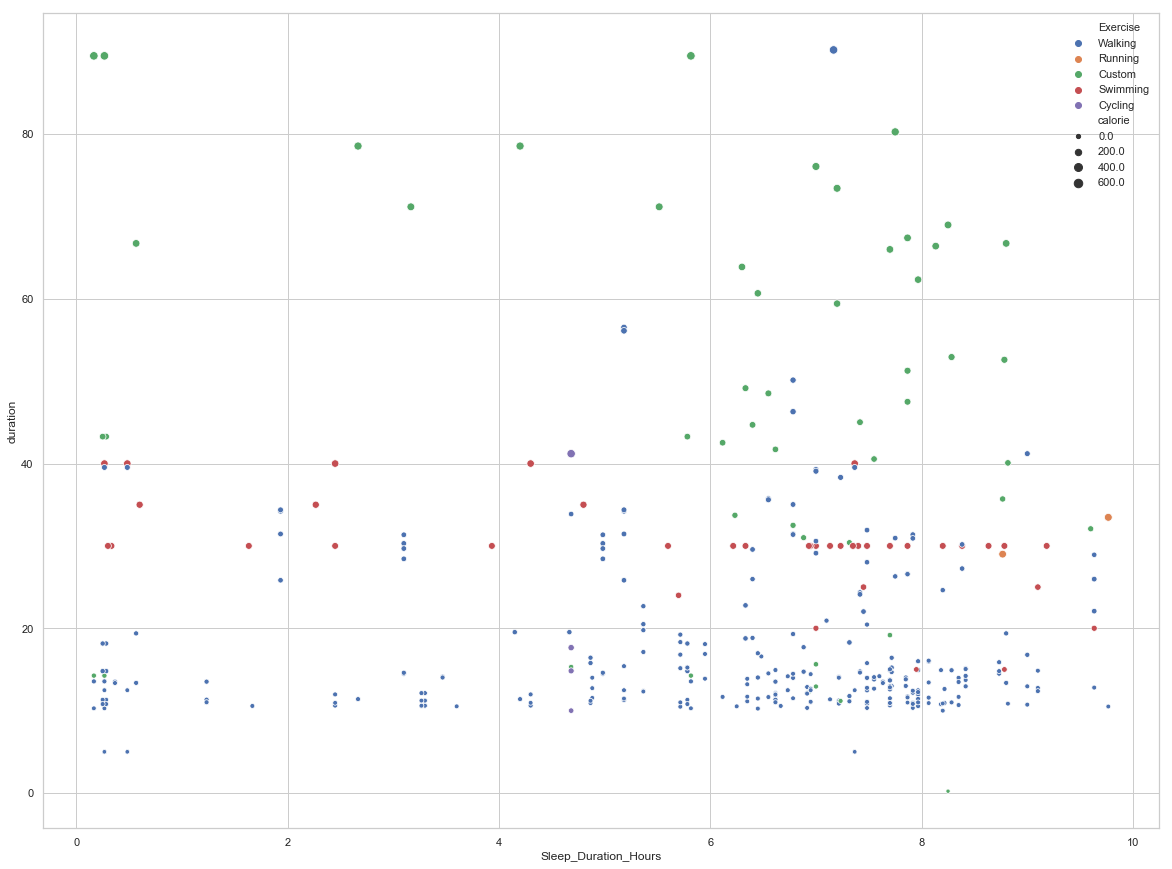

In [68]:
# plot Sleep duration versus Exercise Duration 

plt.figure(figsize=(20,15))

sns.set_style('whitegrid')

sns.scatterplot(x="Sleep_Duration_Hours", 
                y="duration",
                hue='Exercise',
                size='calorie',
                data=Combined_data)


From the above plot it can be seen that there tends to be more data points on the right side of the graph. This shows that the person has a higher chance of working out if the person slept longer.

The data maybe skewed becasue this data is not summed by the day. To get a better of understanding of the relationship between sleep duration and execise duration and different plot will be used next and the data will be summed by day. 

C:\Users\Amar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


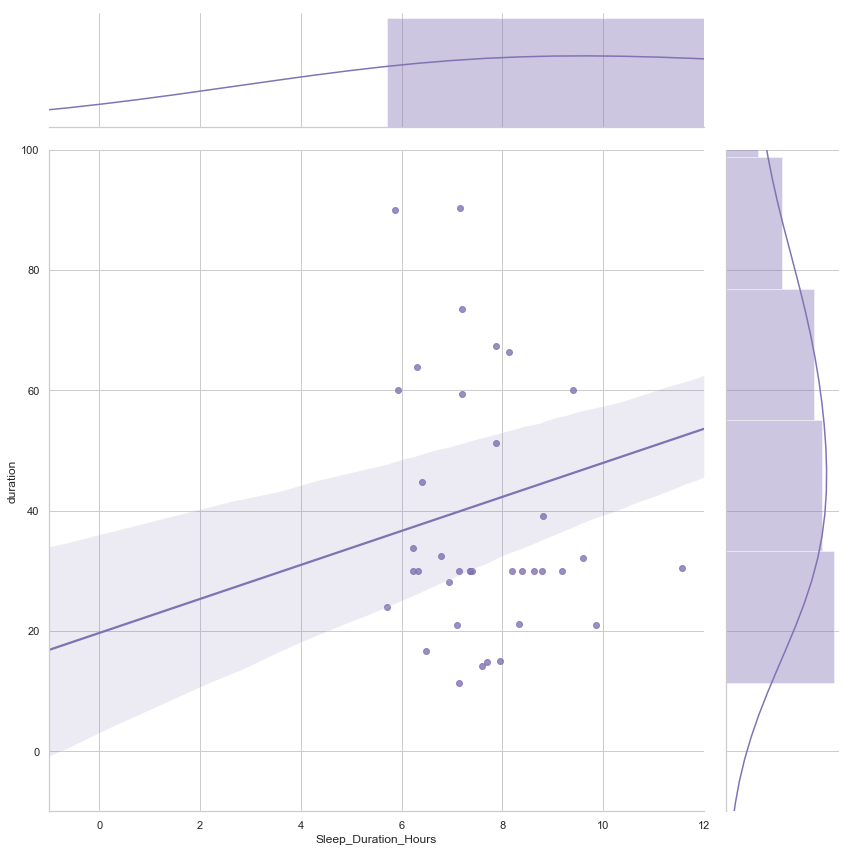

In [69]:
# more detailed plot of sleep duration and exercise duration 
# to get more accurate data the columns will be grouped by the date and aggregated by summing the values
    
Combined_data_sum = Combined_data.groupby('DATE').sum()
Combined_data_sum
    
sns.jointplot(x="Sleep_Duration_Hours", 
                y="duration",
                kind="reg",
                data=Combined_data_sum,
                xlim=(-1, 12), 
                ylim=(-10, 100), 
                color="m", 
                height = 12
            )

From the graph it can be seen that the most common sleep duration is 6 to 9 hours and the mean exercise duration is about 20 minutes. 

It is interesting to note that when he does not sleep  more than 6 hours the person tends not to work out.

There does not seem to be any correlation between the duration of the person workout compared to the person sleep duration. This shows that no matter how much sleep the person gets, it does not affect his workout duration. 

It may affect his work out intesity though. This will be investigated next. 

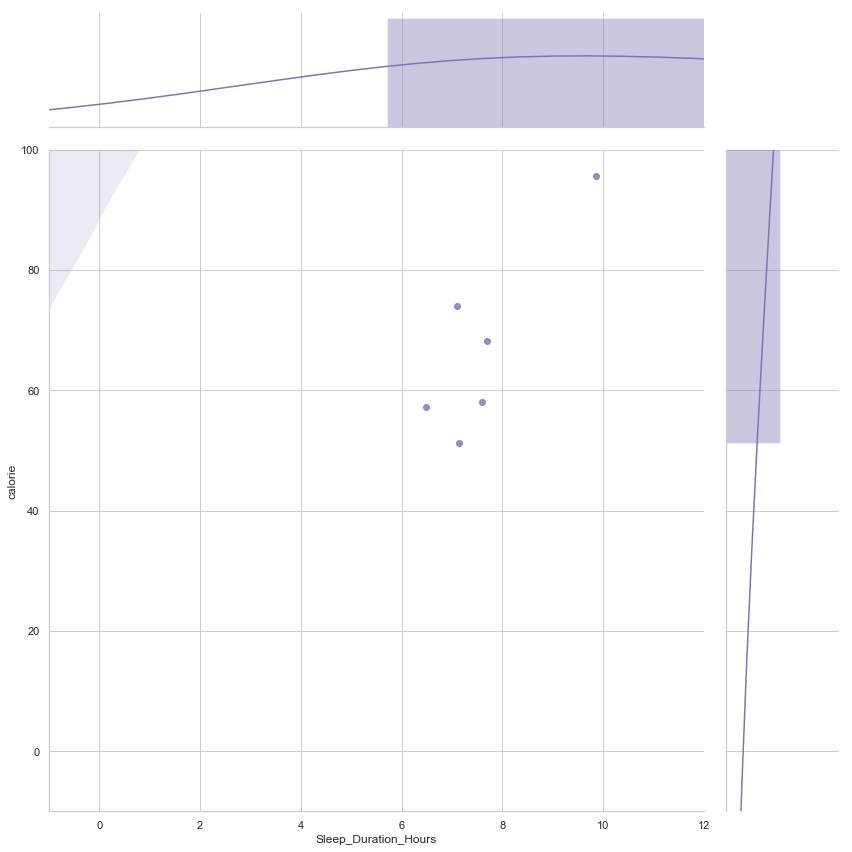

In [70]:
sns.jointplot(x="Sleep_Duration_Hours", 
                y="calorie",
                kind="reg",
                data=Combined_data_sum,
                xlim=(-1, 12), 
                ylim=(-10, 100), 
                color="m", 
                height = 12
            )

From the graph above there does not seem to be any distinct correlation between the sleep duration andd the amount of calories burned in the persons workout. There are also only a few data points becasue there are some calorie data missing for some exercises. 

In [71]:
# combine 

# combine the Exercise date and Sleep data with no naps for accuracy 
Combined_data_2 = pd.merge(left = Step_data, right = Exercise_data, how='inner', left_on = 'DATE',right_on = 'DATE')



Combined_data_2.head()

Combined_df_2 = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Wake_Up_Hour' : Combined_data.End_Time_Adjusted.dt.hour,
             'Exercise_Hour'  : Combined_data.start_time.dt.hour,
             'Sleep_Duration_Hours'    : Combined_data.Sleep_Duration_Hours,
             'Efficiency'    : Combined_data.Efficiency,
             'Exercise_Duration' : Combined_data.duration,
             'mean_heart_rate' : Combined_data.mean_heart_rate,
             'calorie': Combined_data.calorie,
             'distance':Combined_data.distance,
             

            })


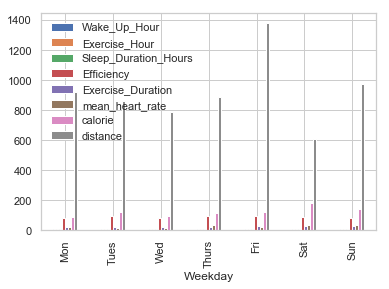

In [72]:
Week_Day_Combined = pd.DataFrame(
            {
             'Weekday'  : Week_Day,   
             'Wake_Up_Hour' : Combined_data.End_Time_Adjusted.dt.hour,
             'Exercise_Hour'  : Combined_data.start_time.dt.hour,
             'Sleep_Duration_Hours'    : Combined_data.Sleep_Duration_Hours,
             'Efficiency'    : Combined_data.Efficiency,
             'Exercise_Duration' : Combined_data.duration,
             'mean_heart_rate' : Combined_data.mean_heart_rate,
             'calorie': Combined_data.calorie,
             'distance':Combined_data.distance,
             

            })

Week_Day_Combined_mean = Week_Day_Combined.groupby('Weekday').mean()\
                   .reindex(['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'])

Week_Day_Combined_mean.plot(kind='bar')

In [73]:
# combine all the data sets together

Concat_df = pd.concat([Sleep_df, Floors_data,Heart_data,Exercise_data,Step_data])

Concat_df = Concat_df.sort_values('start_time').reset_index(drop='True')

Concat_df.groupby(['time_offset']).count()['start_time']

C:\Users\Amar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


time_offset
Calgary Time         11
Halifax Time      10139
India Time            8
Toronto Time        700
Vancouver Time       91
Name: start_time, dtype: int64

It is important to notice that most of the data comes from when the person is in halifax. Therefore the conclusions and inferences on data from Halifax will be more accurate becasue there are more samples. Data from places such as India have very few samples and therefore conclusions and trends observed from that data may not be as accurate. 

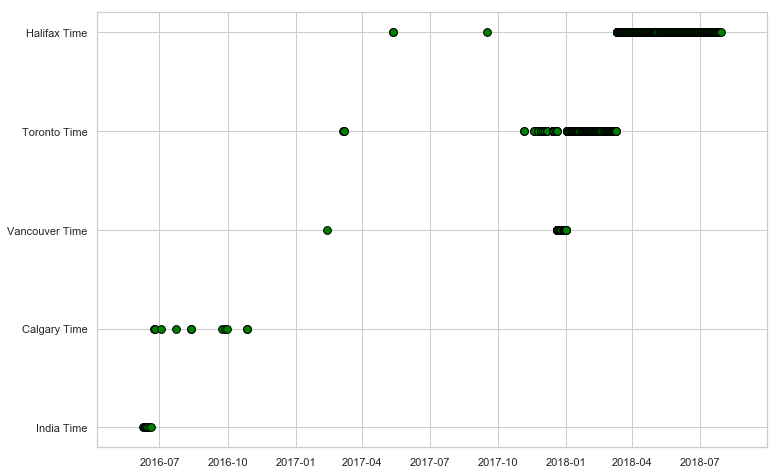

In [74]:
# plot the locations the person has been over time for all the data 
Location_df = pd.DataFrame(
    { 
    'Date' : Concat_df.DATE,
    'Time_Zone' : Concat_df.time_offset    
    })


Location_df.sort_values('Date').reset_index(drop='True')

plt.figure(figsize=(12,8))

plt.scatter(list(Location_df.Date), 
            Location_df.Time_Zone,
            marker ='o',
            color = 'green',
            s=60,
            edgecolors='black')




The graph above shows where the person has been from 2016 to 2018. The person tends to spend more time in the Halifax time zone and Toronto time zone. 

The person spent about 3 months in calgary during the end of 2016.  

From the begining of 2017 to the end of end of 2017, his location is unkown becasue there is not much data from these days. The data is mixed from Vancouver Time, Toronto time and Halifax time. 

From around 2017-10 the person was in Toronto time until 2018 - 04 and may have had a vacation to Vancouver time  around 2018-01. 

The person was then in Halifax time from around 2018 -04 to 2018 - 07. 

This plot shows that person has possibily lived in Calagary time, then Toronto time and then Halifax time. If this is the case, it can be concluded that the person tends to move frequently. The person most likely vaccationed in India time and Vancouver time because there are only a few consectuvie days where the person was in these time zones. 

scatter plot the min max and mean hr for each exercise 

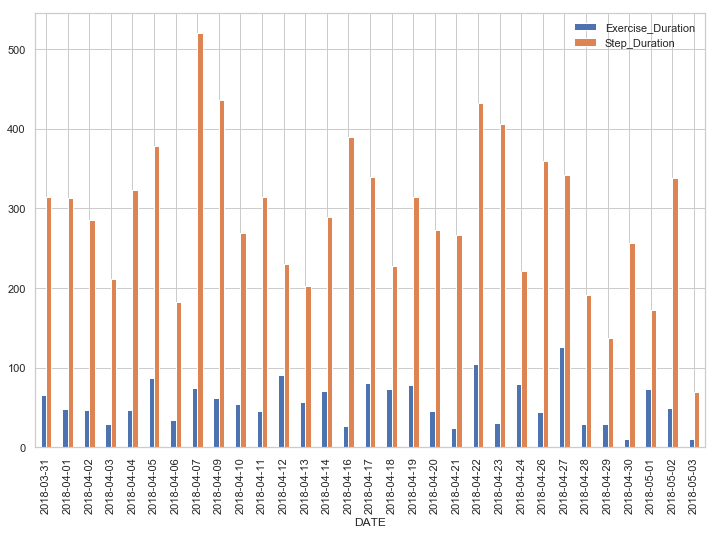

In [75]:
# compare the exercise duration with the step duration 


Step_data['duration'] = abs((Step_data.start_time - Step_data.end_time)/np.timedelta64(1,'m'))

Step_duration_sum = Step_data.groupby('DATE').sum()['duration'].reset_index()
Exercise_duration_sum = Exercise_data.groupby('DATE').sum()['duration'].reset_index()

Step_Exercise_duration = pd.merge(Exercise_duration_sum,Step_duration_sum, how='inner',left_on = 'DATE', right_on = 'DATE')

Step_Exercise_duration.columns = ['DATE','Exercise_Duration', 'Step_Duration']

Step_Exercise_duration.groupby('DATE').sum().plot(kind='bar',
                                                 figsize=(12,8))

From the graph above, the main correlation between exercise duration and step duration is that the person tends to walk for longer than he/she exercises. Other then that, the step duration and exercise duration do not seem to be related 